<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-needed" data-toc-modified-id="Import-needed-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import needed</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Filter-dataset-to-most-frequent-pairs-of-entities" data-toc-modified-id="Filter-dataset-to-most-frequent-pairs-of-entities-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filter dataset to most frequent pairs of entities</a></span></li><li><span><a href="#Analyse-pairs" data-toc-modified-id="Analyse-pairs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse pairs</a></span></li><li><span><a href="#Get-examples-of-each-relationship-type" data-toc-modified-id="Get-examples-of-each-relationship-type-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get examples of each relationship type</a></span></li><li><span><a href="#Get-filtered-by-label-type-pairs" data-toc-modified-id="Get-filtered-by-label-type-pairs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get filtered by label type pairs</a></span></li><li><span><a href="#Sample-from-too-populated-pairs" data-toc-modified-id="Sample-from-too-populated-pairs-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sample from too populated pairs</a></span></li></ul></div>

### Import needed  

In [1]:
import pickle 
import spacy
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from country_list import countries_for_language

ModuleNotFoundError: No module named 'country_list'

### Load data

1. Load data from pickle file

In [2]:
with open('data/D_label.pkl', 'rb') as f: 
    D = pickle.load(f)

D_gr = pd.DataFrame(D, columns = ['r','e1', 'e2', 'e1_label', 'e2_label'])

print(D_gr.shape)

(238581, 5)


In [3]:
with open('data/D05.pkl', 'rb') as f: 
    D2 = pickle.load(f)

D_gr2 = pd.DataFrame(D2, columns = ['r','e1', 'e2', 'e1_label', 'e2_label'])

print(D_gr2.shape)

(833849, 5)


In [4]:
D_gr = D_gr.append(D_gr2)
D_gr.shape

(1072430, 5)

2. Load list of countries

In [7]:
countries = dict(countries_for_language('en'))
countries_en = [countries[i] for i in countries]
countries_en = countries_en + ['USA', 'US', 'UK', 'England', 'Scotland', 'Wales', 'Virgin Islands', 'the United Kingdom', 'the United States', 'U.S.', 'Korea', 'Russian Federation', 'Myanmar']
#countries_en


#countries = dict(countries_for_language('de'))
#countries_de = [countries[i] for i in countries]
#countries_de

In [8]:
#relabel countries from GPE to COUNTRY
for i in range(len(D_gr)):
    line = D_gr.iloc[i]
    if (line['e1_label'] == 'GPE')&(line['e1'] in countries_en): 
        D_gr.iloc[i]['e1_label'] = 'COUNTRY'
    if (line['e2_label'] == 'GPE')&(line['e2'] in countries_en): 
        D_gr.iloc[i]['e2_label'] = 'COUNTRY'

In [5]:
D_grouped = D_gr.groupby(['e1_label', 'e2_label']).count()['r']
df_m = D_grouped.unstack(level=0).fillna(0)
df_m

e1_label     EVENT   FAC     GPE  LANGUAGE  LAW    LOC   NORP    ORG  PERSON  \
e2_label                                                                       
EVENT         1333   100    4495       138   23    267   3300   4506    1130   
FAC            560  1328    4248        21    2    498    961   2778    2028   
GPE           6986  7461  297143      2611  211  20857  65750  60990   48014   
LANGUAGE        27     7    2031      4209   35    116   5982    864     915   
LAW             11     2     139        10   54      5    140    251     128   
LOC            630   328   14223       274   44  13225   6394   4073    3012   
NORP          2107   317   36095      5480   89   2482  57281  15910   16140   
ORG           3477  1299   25769       881  235   1903  19768  65546   32458   
PERSON         871   645   16733       597   43   1129  16588  34568   84286   
PRODUCT        102    48     664        22    4    180   1028   7334    1878   
WORK_OF_ART    119    98     727       152   10     96   1028   3355    4508   

e1_label     PRODUCT  WORK_OF_ART  
e2_label                           
EVENT            123          112  
FAC              119           84  
GPE              995         1351  
LANGUAGE          46          159  
LAW                6           14  
LOC              303          138  
NORP             470          626  
ORG             2373         1914  
PERSON          1001         1866  
PRODUCT          731          129  
WORK_OF_ART      123          829

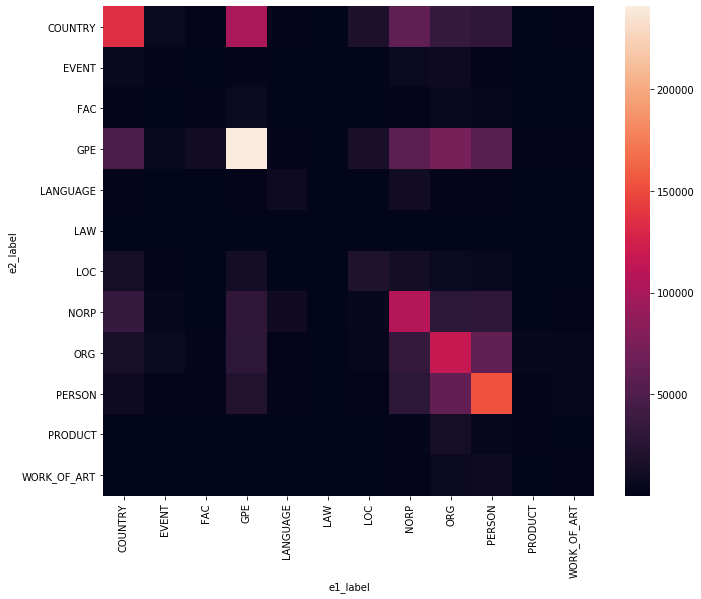

In [10]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.show()

### Filter dataset to most frequent pairs of entities 

1. create alphabetically sorted pairs

In [51]:
D_gr['tup'] = list(zip(D_gr.e1, D_gr.e2))
D_gr['labels'] = list(zip(D_gr.e1_label, D_gr.e2_label))
D_gr['pair'] = [tuple(sorted(tup)) for tup in D_gr['tup']]

In [52]:
D_gr

r                  e1  \
0       ([HS4Air, is, a, proposed, 140, km, high, -, s...  the United Kingdom   
1       ([The, first, high, -, speed, railway, line, t...  the United Kingdom   
2       ([A, second, high, -, speed, line, named, High...              London   
3       ([A, proposal, to, build, a, direct, connectio...              London   
4       ([A, proposal, to, build, a, direct, connectio...              London   
...                                                   ...                 ...   
833844  ([In, 1980, Waring, and, Gillow, joined, with,...              Waring   
833845  ([In, 1980, Waring, and, Gillow, joined, with,...              Waring   
833846  ([In, 1980, Waring, and, Gillow, joined, with,...              Waring   
833847  ([Germany, ,, as, in, many, other, continental...             Germany   
833848  ([Germany, ,, as, in, many, other, continental...             Germany   

                e2 e1_label     e2_label                           pair  \
0          British  COUNTRY         NORP  (British, the United Kingdom)   
1           London  COUNTRY          GPE   (London, the United Kingdom)   
2       Birmingham      GPE          GPE           (Birmingham, London)   
3           Camden      GPE          GPE               (Camden, London)   
4           Camden      GPE          GPE               (Camden, London)   
...            ...      ...          ...                            ...   
833844      Gillow   PERSON       PERSON               (Gillow, Waring)   
833845      Gillow   PERSON       PERSON               (Gillow, Waring)   
833846      Gillow   PERSON       PERSON               (Gillow, Waring)   
833847    European  COUNTRY         NORP            (European, Germany)   
833848         PhD  COUNTRY  WORK_OF_ART                 (Germany, PhD)   

                                  tup                  labels  
0       (the United Kingdom, British)         (COUNTRY, NORP)  
1        (the United Kingdom, London)          (COUNTRY, GPE)  
2                (London, Birmingham)              (GPE, GPE)  
3                    (London, Camden)              (GPE, GPE)  
4                    (London, Camden)              (GPE, GPE)  
...                               ...                     ...  
833844               (Waring, Gillow)        (PERSON, PERSON)  
833845               (Waring, Gillow)        (PERSON, PERSON)  
833846               (Waring, Gillow)        (PERSON, PERSON)  
833847            (Germany, European)         (COUNTRY, NORP)  
833848                 (Germany, PhD)  (COUNTRY, WORK_OF_ART)  

[1906279 rows x 8 columns]

2. filter out pairs which are less than 16 times in the dataset

In [29]:
D16 = D_gr.groupby('pair').filter(lambda x: len(x) > 16)
D16.shape

(1060449, 7)

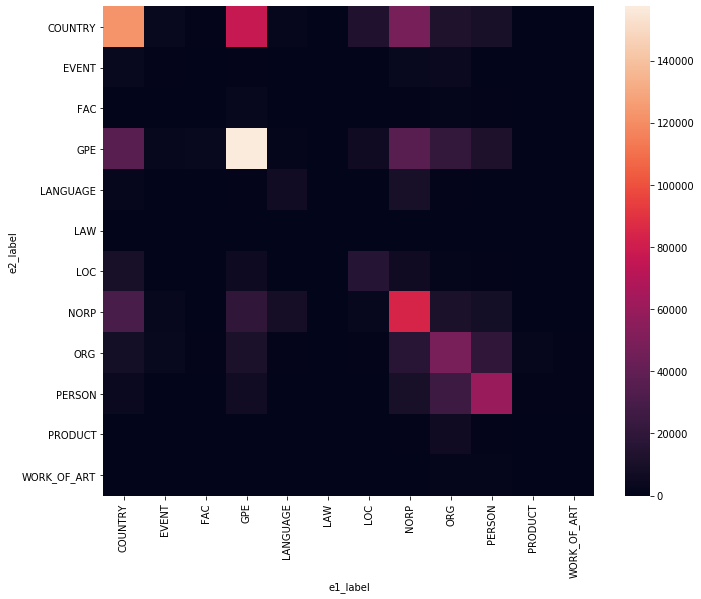

In [30]:
df_m2 = D16.groupby(['e1_label', 'e2_label']).count()['r'].unstack(level=0).fillna(0)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m2)
plt.show()

In [118]:
df_m2

e1_label     COUNTRY  EVENT    FAC      GPE  LANGUAGE  LAW     LOC    NORP  \
e2_label                                                                     
COUNTRY      10920.0  492.0   69.0   9524.0      93.0  0.0  2108.0  2935.0   
EVENT          193.0  337.0   22.0     30.0      83.0  0.0    26.0   320.0   
FAC             30.0  173.0  265.0    432.0       0.0  0.0    61.0    39.0   
GPE           3036.0  807.0  524.0  11344.0      44.0  3.0  1272.0  3288.0   
LANGUAGE        83.0    3.0    0.0     35.0     669.0  0.0     0.0   451.0   
LAW              0.0    0.0    0.0      0.0       0.0  0.0     0.0     0.0   
LOC           1227.0  191.0   12.0    820.0       2.0  0.0  6388.0   452.0   
NORP          1643.0  151.0    6.0   1318.0     624.0  0.0   269.0  4279.0   
ORG            864.0  424.0  314.0   1599.0      44.0  0.0   243.0  2026.0   
PERSON         269.0   44.0   63.0    937.0       7.0  0.0   117.0   726.0   
PRODUCT         31.0    0.0    4.0      4.0       0.0  0.0     3.0     4.0   
WORK_OF_ART      0.0   28.0    4.0      8.0       0.0  0.0    14.0     6.0   

e1_label        ORG  PERSON  PRODUCT  WORK_OF_ART  
e2_label                                           
COUNTRY      1315.0   354.0      9.0         74.0  
EVENT         208.0     3.0      0.0         15.0  
FAC           324.0    50.0     27.0         14.0  
GPE          1891.0   618.0      6.0         83.0  
LANGUAGE        5.0     3.0      0.0          0.0  
LAW             1.0     0.0      0.0          0.0  
LOC           316.0   124.0      9.0          1.0  
NORP          721.0   332.0      0.0          2.0  
ORG          3397.0   419.0    257.0        139.0  
PERSON       2788.0  2122.0      7.0        118.0  
PRODUCT       348.0    11.0     36.0          1.0  
WORK_OF_ART   293.0   201.0      1.0          5.0

### Analyse pairs

In [43]:
#Print out examples of GPE-GPE pairs
for i in range(len(D16)): 
    if D16.iloc[i]['e1_label'] == D16.iloc[i]['e2_label'] == 'GPE': 
        print(i)
        print(D16.iloc[i])
    if i > 500: 
        break

9
r           ([Jeffrey, Clay, Erlanger, was, born, in, Madi...
e1                                                    Madison
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 48, dtype: object
10
r           ([Rogers, happened, to, be, traveling, to, Mil...
e1                                                  Milwaukee
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 50, dtype: object
13
r           ([His, desire, to, run, a, well, -, structured...
e1                                                     Boston
e2                                              Massachusetts
e1_label                                                  GPE
e2_label                                                  GPE
Name: 66, dtyp

554
r           ([Gilpin, trained, the, horse, at, his, Clareh...
e1                                                  Newmarket
e2                                                    Suffolk
e1_label                                                  GPE
e2_label                                                  GPE
Name: 2158, dtype: object
596
r           ([His, wife, ,, Pam, Miller, ,, was, the, mayo...
e1                                                  Lexington
e2                                                   Kentucky
e1_label                                                  GPE
e2_label                                                  GPE
Name: 2325, dtype: object
631
r           ([Catherine, Callaghan, (, born, 1931, ), is, ...
e1                                                   Columbus
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 

r           ([Kimberly, Phillips, is, a, writer, ,, educat...
e1                                                  Vancouver
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 4391, dtype: object
1043
r           ([Fleming, was, born, in, 1958, in, Montreal, ...
e1                                                   Montreal
e2                                                     Quebec
e1_label                                                  GPE
e2_label                                                  GPE
Name: 4394, dtype: object
1046
r           ([The, couple, lived, together, in, Montreal, ...
e1                                                   Montreal
e2                                                     Quebec
e1_label                                                  GPE
e2_label                                                  GPE
Name: 43

1596
r           ([Lodge, was, one, of, four, daughters, born, ...
e1                                                   St. Paul
e2                                                  Minnesota
e1_label                                                  GPE
e2_label                                                  GPE
Name: 6639, dtype: object
1598
r           ([Although, Lodge, returned, to, the, United, ...
e1                                                  Vancouver
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 6643, dtype: object
1617
r           ([Complexly, LLC, is, an, American, online, vi...
e1                                               Indianapolis
e2                                                    Indiana
e1_label                                                  GPE
e2_label                                                  GPE
Nam

Name: 9468, dtype: object
2318
r           ([He, served, as, Associate, Producing, Direct...
e1                                                  Cleveland
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 9470, dtype: object
2323
r           ([The, Aggies, ,, led, by, sixth, year, head, ...
e1                                                 Greensboro
e2                                             North Carolina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 9519, dtype: object
2357
r           ([Emily, Stewart, Lansingh, was, born, on, Feb...
e1                                                    Chicago
e2                                                   Illinois
e1_label                                                  GPE
e2_label                               

Name: 11452, dtype: object
2773
r           ([Favor, Delivery, is, an, on, -, demand, deli...
e1                                                     Austin
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 11537, dtype: object
2794
r           ([It, took, place, at, River, Oaks, Country, C...
e1                                                    Houston
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 11630, dtype: object
2815
r           ([Penava, attended, Peta, Gimnazija, in, Saraj...
e1                                                   Sarajevo
e2                                     Bosnia and Herzegovina
e1_label                                                  GPE
e2_label                            

Name: 13000, dtype: object
3122
r           ([Israel, Lund, (, born, 1980, ,, Bellow, Fall...
e1                                                    Vermont
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 13009, dtype: object
3123
r           ([Israel, Lund, (, born, 1980, ,, Bellow, Fall...
e1                                                   Brooklyn
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 13010, dtype: object
3124
r           ([Israel, Lund, (, born, 1980, ,, Bellow, Fall...
e1                                                    Vermont
e2                                                   New York
e1_label                                                  GPE
e2_label                            

3624
r           ([The, route, identified, by, CLARA, extends, ...
e1                                                  Melbourne
e2                                                     Sydney
e1_label                                                  GPE
e2_label                                                  GPE
Name: 15331, dtype: object
3625
r           ([The, consortium, has, proposed, that, sectio...
e1                                                  Melbourne
e2                                                     Sydney
e1_label                                                  GPE
e2_label                                                  GPE
Name: 15334, dtype: object
3636
r           ([Currently, based, in, Paris, with, his, wife...
e1                                                      Paris
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
N

r           ([Dhar, Khurd, is, a, village, in, Dhar, Kalan...
e1                                                 Dhar Kalan
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 17451, dtype: object
4128
r           ([James, Lavallée, was, born, 6, October, 1997...
e1                                                   Winnipeg
e2                                                   Manitoba
e1_label                                                  GPE
e2_label                                                  GPE
Name: 17465, dtype: object
4131
r           ([This, is, the, 45th, season, for, Dortmund, ...
e1                                                   Dortmund
e2                                     North Rhine-Westphalia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 

Name: 18546, dtype: object
4462
r           ([Rutherford, Parish, ,, New, South, Wales, in...
e1                                      Central Darling Shire
e2                                 North West New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 18547, dtype: object
4463
r           ([Rutherford, Parish, ,, New, South, Wales, in...
e1                                          Yungnulgra County
e2                                 North West New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 18548, dtype: object
4464
r           ([Yerndamboo, ,, New, South, Wales, in, Centra...
e1                                            New South Wales
e2                                      Central Darling Shire
e1_label                                                  GPE
e2_label                            

r           ([She, won, the, Jackie, Robinson, Foundation,...
e1                                                     Queens
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 19600, dtype: object
4824
r           ([Bustamante, was, born, in, Lima, ,, Peru, ,,...
e1                                                    Chicago
e2                                                   Illinois
e1_label                                                  GPE
e2_label                                                  GPE
Name: 19606, dtype: object
4834
r           ([He, plays, for, FC, Spartak-2, Moscow, ., \n...
e1                                                         FC
e2                                                     Moscow
e1_label                                                  GPE
e2_label                                                  GPE
Name: 

5420
r           ([Lipscher, was, born, in, Boston, ,, Massachu...
e1                                                     Boston
e2                                              Massachusetts
e1_label                                                  GPE
e2_label                                                  GPE
Name: 21514, dtype: object
5421
r           ([Appear, Here, launched, offices, in, Paris, ...
e1                                                      Paris
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 21517, dtype: object
5431
r           ([It, is, found, in, Sri, Lanka, ,, India, (, ...
e1                                                    Sumatra
e2                                                     Borneo
e1_label                                                  GPE
e2_label                                                  GPE
N

6049
r           ([He, served, curacies, at, Randwick, in, Sydn...
e1                                                     Sydney
e2                                                  Melbourne
e1_label                                                  GPE
e2_label                                                  GPE
Name: 23437, dtype: object
6079
r           ([On, March, 19, ,, the, band, announced, a, s...
e1                                                  Cleveland
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 23572, dtype: object
6083
r           ([Khruangbin, is, an, American, musical, trio,...
e1                                                    Houston
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
N

r           ([Sabana, Grande, ,, Caracas, \n], (0, 2), (3,...
e1                                              Sabana Grande
e2                                                    Caracas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 25221, dtype: object
6519
r           ([The, boulevard, of, Sabana, Grande, was, bui...
e1                                              Sabana Grande
e2                                                    Caracas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 25227, dtype: object
6520
r           ([Boulevard, of, Sabana, Grande, is, the, only...
e1                                              Sabana Grande
e2                                                    Caracas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 

7190
r           ([Bentley, was, born, and, educated, in, Cinci...
e1                                                 Cincinnati
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 27309, dtype: object
7194
r           ([Craig, -, Lee, was, raised, in, Brisbane, ,,...
e1                                                   Brisbane
e2                                                 Queensland
e1_label                                                  GPE
e2_label                                                  GPE
Name: 27338, dtype: object
7200
r           ([Hadley, was, born, in, Seattle, and, grew, u...
e1                                                    Seattle
e2                                                 Washington
e1_label                                                  GPE
e2_label                                                  GPE
N

7759
r           ([Susan, Kelk, graduated, high, school, early,...
e1                                                     Dallas
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 29806, dtype: object
7764
r           ([Primaveras, is, a, band, from, Los, Angeles,...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 29832, dtype: object
7768
r           ([The, following, year, ,, she, was, the, invi...
e1                                                 Louisville
e2                                                   Kentucky
e1_label                                                  GPE
e2_label                                                  GPE
N

8179
r           ([He, made, his, international, debut, for, Tr...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 31324, dtype: object
8181
r           ([He, made, his, international, debut, for, Tr...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 31328, dtype: object
8183
r           ([He, was, murdered, in, May, 1869, ,, after, ...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
N

8984
r           ([It, is, found, in, India, (, NE, Himalaya, )...
e1                                        Peninsular Malaysia
e2                                                     Borneo
e1_label                                                  GPE
e2_label                                                  GPE
Name: 34179, dtype: object
8988
r           ([After, obtaining, his, M.D, degree, ,, he, d...
e1                                                  St. Louis
e2                                                   Missouri
e1_label                                                  GPE
e2_label                                                  GPE
Name: 34188, dtype: object
9003
r           ([It, is, found, in, Oriental, tropics, of, Ch...
e1                                                     Borneo
e2                                                   Sulawesi
e1_label                                                  GPE
e2_label                                                  GPE
N

9704
r           ([These, were, later, known, as, Cleopatra, 's...
e1                                                   New York
e2                                                     London
e1_label                                                  GPE
e2_label                                                  GPE
Name: 37124, dtype: object
9707
r           ([Dawson, was, born, in, Des, Moines, ,, Iowa,...
e1                                                 Des Moines
e2                                                       Iowa
e1_label                                                  GPE
e2_label                                                  GPE
Name: 37137, dtype: object
9709
r           ([Haridevpur, is, a, neighbourhood, of, South,...
e1                                                    Kolkata
e2                                                West Bengal
e1_label                                                  GPE
e2_label                                                  GPE
N

11018
r           ([Heather, Kelley, was, hired, in, October, 19...
e1                                                    Houston
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 42208, dtype: object
11028
r           ([Dray, earned, a, Bachelor, of, Arts, in, Psy...
e1                                                    Oakland
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 42230, dtype: object
11030
r           ([Before, she, became, the, most, celebrated, ...
e1                                                    Norfolk
e2                                                   Virginia
e1_label                                                  GPE
e2_label                                                  GP

11831
r           ([The, separatists, employed, infantry, weapon...
e1                                                   Pavlopil
e2                                                    Hnutove
e1_label                                                  GPE
e2_label                                                  GPE
Name: 43738, dtype: object
11834
r           ([The, separatists, employed, infantry, weapon...
e1                                                   Pavlopil
e2                                                 Lebedinske
e1_label                                                  GPE
e2_label                                                  GPE
Name: 43741, dtype: object
11837
r           ([The, separatists, employed, infantry, weapon...
e1                                                    Hnutove
e2                                                 Lebedinske
e1_label                                                  GPE
e2_label                                                  GP

12453
r           ([In, the, surroundings, of, Donetsk, city, ,,...
e1                                                    Donetsk
e2                                                   Avdiivka
e1_label                                                  GPE
e2_label                                                  GPE
Name: 45258, dtype: object
12454
r           ([In, the, surroundings, of, Donetsk, city, ,,...
e1                                                    Donetsk
e2                                                     Opytne
e1_label                                                  GPE
e2_label                                                  GPE
Name: 45260, dtype: object
12455
r           ([In, the, surroundings, of, Donetsk, city, ,,...
e1                                                   Avdiivka
e2                                                     Opytne
e1_label                                                  GPE
e2_label                                                  GP

13182
r           ([Novohryhorivka, was, shelled, by, armoured, ...
e1                                                  Talakivka
e2                                                  Shyrokyne
e1_label                                                  GPE
e2_label                                                  GPE
Name: 46716, dtype: object
13184
r           ([Novohryhorivka, was, shelled, by, armoured, ...
e1                                                    Hnutove
e2                                                  Shyrokyne
e1_label                                                  GPE
e2_label                                                  GPE
Name: 46721, dtype: object
13225
r           ([In, the, surroundings, of, Donetsk, city, ,,...
e1                                                    Donetsk
e2                                           Verkhnyotoretske
e1_label                                                  GPE
e2_label                                                  GP

13730
r           ([James, Mastin, was, born, in, South, Dakota,...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 48103, dtype: object
13731
r           ([He, moved, to, Miami, ,, Florida, in, the, 1...
e1                                                      Miami
e2                                                    Florida
e1_label                                                  GPE
e2_label                                                  GPE
Name: 48105, dtype: object
13732
r           ([The, Fawdon, Wagonway, was, from, 1818, to, ...
e1                                                  Newcastle
e2                                                       Tyne
e1_label                                                  GPE
e2_label                                                  GP

Name: 50885, dtype: object
14335
r           ([Born, in, Nashville, ,, Tennessee, ,, Kenned...
e1                                                  Nashville
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  GPE
Name: 50887, dtype: object
14337
r           ([Jim, Steg, (, 1922, -, 2001, ), was, an, art...
e1                                                New Orleans
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 50911, dtype: object
14338
r           ([Born, in, Alexandria, ,, Virginia, but, rais...
e1                                                 Alexandria
e2                                                   Virginia
e1_label                                                  GPE
e2_label                         

r           ([Quirk, was, born, in, New, Orleans, ,, Louis...
e1                                                New Orleans
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 52601, dtype: object
14763
r           ([They, played, home, games, at, the, Redwood,...
e1                                                     Arcata
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 52608, dtype: object
14768
r           ([SecurityScorecard, is, an, information, secu...
e1                                              New York City
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name

r           ([Norman, Foote, Marsh, (, 1871, -, 1955, ), w...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 55203, dtype: object
15494
r           ([He, served, as, the, fourth, mayor, of, Nash...
e1                                                  Nashville
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  GPE
Name: 55209, dtype: object
15495
r           ([He, moved, to, Lexington, ,, Kentucky, ,, wh...
e1                                                  Lexington
e2                                                   Kentucky
e1_label                                                  GPE
e2_label                                                  GPE
Name

Name: 56874, dtype: object
15996
r           ([The, M75, mortar, is, designed, by, Military...
e1                                                   Belgrade
e2                                                 Yugoslavia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 57150, dtype: object
16000
r           ([Pine, Hill, (, Walton, ,, Delaware, County, ...
e1                                            Delaware County
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 57217, dtype: object
16008
r           ([Crossroads, is, a, multisite, interdenominat...
e1                                                 Cincinnati
e2                                                       Ohio
e1_label                                                  GPE
e2_label                         

16451
r           ([The, Indian, general, election, ,, 1991, in,...
e1                                                      Jammu
e2                                                    Kashmir
e1_label                                                  GPE
e2_label                                                  GPE
Name: 58725, dtype: object
16497
r           ([AggregateIQ, (, AIQ, ), is, a, Canadian, pol...
e1                                                   Victoria
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 58932, dtype: object
16498
r           ([As, of, February, 2017, ,, AIQ, employed, 20...
e1                                                   Victoria
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GP

17154
r           ([Dinehart, was, born, in, Chicago, ,, Illinoi...
e1                                                    Chicago
e2                                                   Illinois
e1_label                                                  GPE
e2_label                                                  GPE
Name: 61216, dtype: object
17155
r           ([Dinehart, went, to, the, Slayton, Public, Sc...
e1                                                Minneapolis
e2                                                  Minnesota
e1_label                                                  GPE
e2_label                                                  GPE
Name: 61218, dtype: object
17159
r           ([He, painted, ", New, York, –, an, Abstractio...
e1                                                   New York
e2                                                     London
e1_label                                                  GPE
e2_label                                                  GP

17546
r           ([She, was, a, researcher, for, the, black, so...
e1                                                  Nashville
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  GPE
Name: 62466, dtype: object
17580
r           ([This, season, features, Nick, Cummins, ,, a,...
e1                                                     Sydney
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 62569, dtype: object
17600
r           ([The, United, States, Air, Force, 's, 147th, ...
e1                                                    Houston
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GP

17896
r           ([They, played, home, games, at, the, Redwood,...
e1                                                     Arcata
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 63614, dtype: object
17936
r           ([in, Green, Bay, ,, Wisconsin, ,, were, built...
e1                                                  Green Bay
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 63782, dtype: object
17938
r           ([In, 2000, ,, Angela, moved, to, Vancouver, ,...
e1                                                  Vancouver
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GP

18200
r           ([Amity, Hill, is, a, populated, place, in, Ch...
e1                                             Iredell County
e2                                             North Carolina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 64527, dtype: object
18206
r           ([However, ,, in, 2014, the, family, relocated...
e1                                                    Phoenix
e2                                                    Arizona
e1_label                                                  GPE
e2_label                                                  GPE
Name: 64540, dtype: object
18207
r           ([Later, that, year, ,, the, Green, family, re...
e1                                                    Phoenix
e2                                                    Arizona
e1_label                                                  GPE
e2_label                                                  GP

18526
r           ([FirstService, Corporation, is, a, Canadian, ...
e1                                                    Toronto
e2                                                    Ontario
e1_label                                                  GPE
e2_label                                                  GPE
Name: 65491, dtype: object
18529
r           ([Buildings, managed, by, FirstService, includ...
e1                                                    Toronto
e2                                                    Ontario
e1_label                                                  GPE
e2_label                                                  GPE
Name: 65501, dtype: object
18533
r           ([Ashburton, was, a, ward, in, the, London, Bo...
e1                                                     London
e2                                                    Croydon
e1_label                                                  GPE
e2_label                                                  GP

Name: 66658, dtype: object
18953
r           ([Three, in, -, state, series, will, be, guara...
e1                                                   Illinois
e2                                                    Indiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 66718, dtype: object
18954
r           ([The, Big, Ten, Tournament, will, return, to,...
e1                                                    Chicago
e2                                                   Illinois
e1_label                                                  GPE
e2_label                                                  GPE
Name: 66735, dtype: object
18955
r           ([Illinois, ,, Indiana, ,, Michigan, ,, Nebras...
e1                                                   Illinois
e2                                                    Indiana
e1_label                                                  GPE
e2_label                         

19440
r           ([Seven, photographs, of, Wasserberger, and, 6...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 67936, dtype: object
19441
r           ([He, died, in, New, York, on, April, 23, ,, 2...
e1                                                     Queens
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 67938, dtype: object
19456
r           ([She, was, trained, throughout, his, career, ...
e1                                                  Newmarket
e2                                                    Suffolk
e1_label                                                  GPE
e2_label                                                  GP

Name: 70386, dtype: object
20221
r           ([Click, Tha, Supah, Latin, (, real, name, Ant...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 70396, dtype: object
20222
r           ([The, John, Sevier, State, Office, Building, ...
e1                                                  Nashville
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  GPE
Name: 70409, dtype: object
20251
r           ([Out, of, 290, applicants, ,, the, Competitio...
e1                                                 Fort Worth
e2                                                      Texas
e1_label                                                  GPE
e2_label                         

20568
r           ([Sarajevo, is, an, international, student, gr...
e1                                                   Sarajevo
e2                                     Bosnia and Herzegovina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 71949, dtype: object
20569
r           ([Sarajevo, is, an, international, student, gr...
e1                                                   Sarajevo
e2                                     Bosnia and Herzegovina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 71950, dtype: object
20576
r           ([Spiritus, Progenitum, is, an, international,...
e1                                                   Sarajevo
e2                                     Bosnia and Herzegovina
e1_label                                                  GPE
e2_label                                                  GP

Name: 72785, dtype: object
20774
r           ([Illinois, was, won, by, the, Republican, nom...
e1                                                   Illinois
e2                                                    Indiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 72793, dtype: object
20779
r           ([Fulton, Parish, in, Mouramba, County, ,, cen...
e1                                            Mouramba County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 72804, dtype: object
20782
r           ([Goold, Parish, in, Mouramba, County, ,, cent...
e1                                            Mouramba County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                         

Name: 74181, dtype: object
21066
r           ([The, law, can, not, simply, be, struck, from...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 74183, dtype: object
21067
r           ([His, Instagram, ,, Twitter, and, Facebook, )...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 74187, dtype: object
21068
r           ([James, began, his, career, as, a, lawyer, ,,...
e1                                                 Birmingham
e2                                                    Alabama
e1_label                                                  GPE
e2_label                         

21367
r           ([Bure, Nangal, is, a, village, in, Batala, in...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 74900, dtype: object
21373
r           ([Burj, Araian, is, a, village, in, Batala, in...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 74906, dtype: object
21379
r           ([Chahal, Kalan, is, a, village, in, Batala, i...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GP

21761
r           ([The, following, is, a, list, of, the, north,...
e1                                                   Edmonton
e2                                                    Alberta
e1_label                                                  GPE
e2_label                                                  GPE
Name: 76079, dtype: object
21763
r           ([97, Street, is, a, major, arterial, road, in...
e1                                                   Edmonton
e2                                                    Alberta
e1_label                                                  GPE
e2_label                                                  GPE
Name: 76089, dtype: object
21767
r           ([Carlson, spent, much, of, his, earlier, chil...
e1                                                Minneapolis
e2                                                  Minnesota
e1_label                                                  GPE
e2_label                                                  GP

Name: 77059, dtype: object
22215
r           ([Mandiala, is, a, village, in, Batala, in, Gu...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 77065, dtype: object
22221
r           ([Meekey, is, a, village, in, Batala, in, Gurd...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 77071, dtype: object
22228
r           ([Veela, Bajju, is, a, village, in, Batala, in...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                         

Name: 77778, dtype: object
22810
r           ([Qadian, Rajputan, is, a, village, in, Batala...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 77784, dtype: object
22816
r           ([Talwandi, Bha, -, rath, is, a, village, in, ...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 77790, dtype: object
22823
r           ([Raliali, Khurd, is, a, village, in, Batala, ...
e1                                                     Batala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                         

23657
r           ([The, 1945, Dwars, door, België, was, the, in...
e1                                                     België
e2                                                 Vlaanderen
e1_label                                                  GPE
e2_label                                                  GPE
Name: 78983, dtype: object
23696
r           ([The, 1970, Dwars, door, België, was, the, 26...
e1                                                     België
e2                                                 Vlaanderen
e1_label                                                  GPE
e2_label                                                  GPE
Name: 79168, dtype: object
23701
r           ([The, 1972, Dwars, door, België, was, the, 27...
e1                                                     België
e2                                                 Vlaanderen
e1_label                                                  GPE
e2_label                                                  GP

24111
r           ([Whittier, Trust, has, offices, in, South, Pa...
e1                                                       Reno
e2                                                     Nevada
e1_label                                                  GPE
e2_label                                                  GPE
Name: 80772, dtype: object
24112
r           ([Whittier, Trust, has, offices, in, South, Pa...
e1                                                    Seattle
e2                                                 Washington
e1_label                                                  GPE
e2_label                                                  GPE
Name: 80773, dtype: object
24113
r           ([Whittier, Trust, has, offices, in, South, Pa...
e1                                                   Portland
e2                                                     Oregon
e1_label                                                  GPE
e2_label                                                  GP

Name: 82204, dtype: object
24496
r           ([Pattiwaras, is, a, village, in, Sultanpur, L...
e1                                                 Kapurthala
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 82210, dtype: object
24529
r           ([List, of, historic, properties, in, Tucson, ...
e1                                                     Tucson
e2                                                    Arizona
e1_label                                                  GPE
e2_label                                                  GPE
Name: 82305, dtype: object
24530
r           ([This, is, a, list, of, historic, properties,...
e1                                                     Tucson
e2                                                    Arizona
e1_label                                                  GPE
e2_label                         

24895
r           ([Steele, Hall, (, Memphis, ,, Tennessee, ), \...
e1                                                    Memphis
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  GPE
Name: 83601, dtype: object
24896
r           ([Steele, Hall, ,, on, the, campus, of, LeMoyn...
e1                                                    Memphis
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  GPE
Name: 83602, dtype: object
24898
r           ([Grammar, School, in, Dubai, is, a, private, ...
e1                                                      Dubai
e2                                                        UAE
e1_label                                                  GPE
e2_label                                                  GP

25417
r           ([Cuney, Homes, is, a, public, housing, comple...
e1                                                    Houston
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 85130, dtype: object
25422
r           ([", Chiloglottis, ×, pescottiana, ", grows, i...
e1                                                   Victoria
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 85173, dtype: object
25452
r           ([The, Stock, Journal, is, a, weekly, newspape...
e1                                                   Adelaide
e2                                            South Australia
e1_label                                                  GPE
e2_label                                                  GP

26135
r           ([After, residing, in, Green, Bay, ,, Wisconsi...
e1                                                  Green Bay
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 86911, dtype: object
26136
r           ([After, residing, in, Green, Bay, ,, Wisconsi...
e1                                                  Green Bay
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 86912, dtype: object
26137
r           ([After, residing, in, Green, Bay, ,, Wisconsi...
e1                                                  Green Bay
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GP

26945
r           ([The, event, took, place, on, July, 22, ,, 20...
e1                                                    Toronto
e2                                                    Ontario
e1_label                                                  GPE
e2_label                                                  GPE
Name: 88939, dtype: object
27077
r           ([It, occurs, in, south, -, eastern, Queenslan...
e1                                                 Queensland
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 89176, dtype: object
27082
r           ([The, American, Catholic, Historical, Society...
e1                                               Philadelphia
e2                                               Pennsylvania
e1_label                                                  GPE
e2_label                                                  GP

27695
r           ([American, CEO, ,, investor, ,, advisor, and,...
e1                                                      Miami
e2                                                    Florida
e1_label                                                  GPE
e2_label                                                  GPE
Name: 90686, dtype: object
27716
r           ([He, also, worked, as, an, associate, in, the...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 90720, dtype: object
27720
r           ([GlobalSecurity.org, is, headquartered, in, t...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GP

28771
r           ([Urabrible, ,, New, South, Wales, is, a, rura...
e1                                            New South Wales
e2                                               Gowen County
e1_label                                                  GPE
e2_label                                                  GPE
Name: 93442, dtype: object
28772
r           ([Urabrible, ,, New, South, Wales, is, a, rura...
e1                                               Gowen County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 93445, dtype: object
28865
r           ([He, entered, Queen, 's, University, ,, Belfa...
e1                                                    Belfast
e2                                           Northern Ireland
e1_label                                                  GPE
e2_label                                                  GP

29435
r           ([Ganoo, is, a, civil, parish, of, Gordon, Cou...
e1                                              Gordon County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 96058, dtype: object
29440
r           ([Dubbo, Parish, (, Gordon, County, ), ,, is, ...
e1                                              Gordon County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 96130, dtype: object
29441
r           ([Dubbo, Parish, (, Gordon, County, ), ,, is, ...
e1                                              Gordon County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GP

Name: 97111, dtype: object
29898
r           ([Terangan, Parish, (, Oxley, County, ), ,, Ne...
e1                                               Oxley County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 97113, dtype: object
29900
r           ([Terangan, Parish, (, Oxley, County, ), ,, Ne...
e1                                               Oxley County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 97115, dtype: object
29901
r           ([Terangan, Parish, (, Oxley, County, ), ,, Ne...
e1                                            New South Wales
e2                                               Oxley County
e1_label                                                  GPE
e2_label                         

31141
r           ([Afro, Beat, Fest, is, an, annual, festival, ...
e1                                                     Newark
e2                                                 New Jersey
e1_label                                                  GPE
e2_label                                                  GPE
Name: 99581, dtype: object
31148
r           ([Born, John, Sandifer, on, June, 6, ,, 1914, ...
e1                                                 Greensboro
e2                                             North Carolina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 99614, dtype: object
31190
r           ([The, family, moved, to, Madison, ,, Wisconsi...
e1                                                    Madison
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GP

31860
r           ([The, Municipality, of, Granville, was, a, lo...
e1                                                     Sydney
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 101361, dtype: object
32008
r           ([Saspol, Caves, are, situated, in, the, hills...
e1                                                      Jammu
e2                                                    Kashmir
e1_label                                                  GPE
e2_label                                                  GPE
Name: 101568, dtype: object
32066
r           ([Brunswick, Baths, is, a, Victorian, Heritage...
e1                                                  Melbourne
e2                                                   Victoria
e1_label                                                  GPE
e2_label                                                  

32793
r           ([Yerrobana, Palle, (, also, known, as, Yerrao...
e1                                                     Andhra
e2                                                    Pradesh
e1_label                                                  GPE
e2_label                                                  GPE
Name: 103663, dtype: object
32824
r           ([Egelabra, Parish, (, Oxley, County, ), ,, Ne...
e1                                               Oxley County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 103723, dtype: object
32825
r           ([Egelabra, Parish, (, Oxley, County, ), ,, Ne...
e1                                               Oxley County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  

Name: 105834, dtype: object
33571
r           ([Gersten, grew, up, in, Newark, ,, New, Jerse...
e1                                                     Newark
e2                                                 New Jersey
e1_label                                                  GPE
e2_label                                                  GPE
Name: 105907, dtype: object
33574
r           ([[, [, Category, :, People, from, Newark, ,, ...
e1                                                     Newark
e2                                                 New Jersey
e1_label                                                  GPE
e2_label                                                  GPE
Name: 105924, dtype: object
33579
r           ([Amanda, Gorman, is, an, American, poet, and,...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                      

Name: 107323, dtype: object
34305
r           ([Rasulpur, is, a, village, in, Nakodar, in, J...
e1                                                    Nakodar
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 107324, dtype: object
34307
r           ([Rasulpur, is, a, village, in, Nakodar, in, J...
e1                                                  Jalandhar
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 107326, dtype: object
34310
r           ([Sianiwal, is, a, village, in, Nakodar, in, J...
e1                                                    Nakodar
e2                                                  Jalandhar
e1_label                                                  GPE
e2_label                      

34788
r           ([Mable, ", Mama, ", Howard, (, February, 3, ,...
e1                                                   Berkeley
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 108690, dtype: object
34789
r           ([In, 1947, ,, Mable, and, Rolly, moved, their...
e1                                                   Berkeley
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 108691, dtype: object
34903
r           ([Samantha, Wallace, (, born, 16, January, 199...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  

35400
r           ([Bhandal, Sahib, Rai, is, a, village, in, Phi...
e1                                                   Phillaur
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 109719, dtype: object
35402
r           ([Bhandal, Sahib, Rai, is, a, village, in, Phi...
e1                                                  Jalandhar
e2                                               Punjab State
e1_label                                                  GPE
e2_label                                                  GPE
Name: 109721, dtype: object
35405
r           ([Bhallowal, is, a, village, in, Phillaur, in,...
e1                                                   Phillaur
e2                                                  Jalandhar
e1_label                                                  GPE
e2_label                                                  

36333
r           ([best, known, for, his, work, with, the, Chin...
e1                                                   Brisbane
e2                                                 Queensland
e1_label                                                  GPE
e2_label                                                  GPE
Name: 111899, dtype: object
36434
r           ([The, Al, Jazeera, Balkans, Documentary, Film...
e1                                                   Sarajevo
e2                                     Bosnia and Herzegovina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 112407, dtype: object
36440
r           ([Mirjana, Bjelogrlić, -, Nikolov, (, Serbian,...
e1                                                   Belgrade
e2                                                 Yugoslavia
e1_label                                                  GPE
e2_label                                                  

37363
r           ([It, is, held, annually, in, Ilidža, ,, Saraj...
e1                                                   Sarajevo
e2                                     Bosnia and Herzegovina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 114406, dtype: object
37364
r           ([Abbotsholme, College, was, an, private, scho...
e1                                                     Sydney
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 114412, dtype: object
37370
r           ([David, Jones, was, an, African, -, American,...
e1                                                  Nashville
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  

38357
r           ([Fairy, lanterns, is, widespread, and, common...
e1                                                 Queensland
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 116211, dtype: object
38358
r           ([Fairy, lanterns, is, widespread, and, common...
e1                                                     Sydney
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 116212, dtype: object
38466
r           ([India, competed, at, the, 2018, Asian, Games...
e1                                                    Jakarta
e2                                                  Palembang
e1_label                                                  GPE
e2_label                                                  

39862
r           ([Runnymede, Parish, ,, New, South, Wales, is,...
e1                                            New South Wales
e2                                                Bogan Shire
e1_label                                                  GPE
e2_label                                                  GPE
Name: 118893, dtype: object
39863
r           ([Runnymede, Parish, ,, New, South, Wales, is,...
e1                                                Bogan Shire
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 118896, dtype: object
39864
r           ([Runnymede, Parish, ,, New, South, Wales, is,...
e1                                                Bogan Shire
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  

40586
r           ([Muriel, Drazien, ,, born, in, New, York, ,, ...
e1                                                   New York
e2                                                      Paris
e1_label                                                  GPE
e2_label                                                  GPE
Name: 120139, dtype: object
40589
r           ([The, season, was, primarily, filmed, in, Los...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 120157, dtype: object
40598
r           ([Errol, Aguilera, (, born, 24, May, 1978, ), ...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  

Name: 121508, dtype: object
41203
r           ([Cumbedore, Parish, ,, Yanda, County, in, Bou...
e1                                               Yanda County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 121510, dtype: object
41204
r           ([Cumbedore, Parish, ,, Yanda, County, in, Bou...
e1                                               Bourke Shire
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 121511, dtype: object
41205
r           ([Cumbedore, Parish, ,, Yanda, County, in, Bou...
e1                                               Bourke Shire
e2                                            New South Wales
e1_label                                                  GPE
e2_label                      

41632
r           ([Panken, was, born, on, May, 19, ,, 1964, ,, ...
e1                                              New York City
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 122169, dtype: object
41648
r           ([Gadale, is, a, village, in, Mulshi, taluka, ...
e1                                                     Mulshi
e2                                                Maharashtra
e1_label                                                  GPE
e2_label                                                  GPE
Name: 122192, dtype: object
41653
r           ([Gadale, is, a, village, in, Mulshi, taluka, ...
e1                                                     Mulshi
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                                                  

Name: 122715, dtype: object
42170
r           ([Jawal, is, a, village, in, Mulshi, taluka, o...
e1                                                Maharashtra
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                                                  GPE
Name: 122726, dtype: object
42181
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                             Thane district
e1_label                                                  GPE
e2_label                                                  GPE
Name: 122737, dtype: object
42182
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                      

Name: 123309, dtype: object
42667
r           ([Districts, closest, to, the, village, are, R...
e1                                                Mumbai City
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 123310, dtype: object
42680
r           ([Kemasewadi, is, a, village, in, Mulshi, talu...
e1                                                     Mulshi
e2                                                Maharashtra
e1_label                                                  GPE
e2_label                                                  GPE
Name: 123323, dtype: object
42685
r           ([Kemasewadi, is, a, village, in, Mulshi, talu...
e1                                                     Mulshi
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                      

43209
r           ([Districts, closest, to, the, village, are, R...
e1                                                Mumbai City
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 123864, dtype: object
43221
r           ([Kondhur, is, a, village, in, Mulshi, taluka,...
e1                                                     Mulshi
e2                                                Maharashtra
e1_label                                                  GPE
e2_label                                                  GPE
Name: 123876, dtype: object
43226
r           ([Kondhur, is, a, village, in, Mulshi, taluka,...
e1                                                     Mulshi
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                                                  

43552
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                                                  GPE
Name: 124218, dtype: object
43553
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 124219, dtype: object
43554
r           ([Districts, closest, to, the, village, are, R...
e1                                             Thane district
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                                                  

43916
r           ([Dortmund, -, Aplerbeck, Süd, station, is, a,...
e1                                                   Dortmund
e2                                     North Rhine-Westphalia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 124595, dtype: object
43918
r           ([Dortmund, -, Aplerbeck, Süd, station, is, a,...
e1                                                   Dortmund
e2                                     North Rhine-Westphalia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 124597, dtype: object
43945
r           ([Mukaiwadi, is, a, village, in, Mulshi, taluk...
e1                                                     Mulshi
e2                                                Maharashtra
e1_label                                                  GPE
e2_label                                                  

Name: 125119, dtype: object
44419
r           ([Nere, is, a, village, in, Mulshi, taluka, of...
e1                                                     Mulshi
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125124, dtype: object
44430
r           ([Nere, is, a, village, in, Mulshi, taluka, of...
e1                                                Maharashtra
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125135, dtype: object
44441
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                             Thane district
e1_label                                                  GPE
e2_label                      

Name: 125360, dtype: object
44637
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                             Thane district
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125371, dtype: object
44638
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125372, dtype: object
44639
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                      

Name: 125647, dtype: object
44911
r           ([Districts, closest, to, the, village, are, R...
e1                                             Thane district
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125648, dtype: object
44912
r           ([Districts, closest, to, the, village, are, R...
e1                                                Mumbai City
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125649, dtype: object
44925
r           ([Sakhari, is, a, village, in, Mulshi, taluka,...
e1                                                     Mulshi
e2                                                Maharashtra
e1_label                                                  GPE
e2_label                      

Name: 125903, dtype: object
45175
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                             Thane district
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125914, dtype: object
45176
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                                                  GPE
Name: 125915, dtype: object
45177
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                      

Name: 126141, dtype: object
45400
r           ([Districts, closest, to, the, village, are, R...
e1                                             Thane district
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                                                  GPE
Name: 126142, dtype: object
45401
r           ([Districts, closest, to, the, village, are, R...
e1                                             Thane district
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 126143, dtype: object
45402
r           ([Districts, closest, to, the, village, are, R...
e1                                                Mumbai City
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                      

Name: 126452, dtype: object
45694
r           ([Districts, closest, to, the, village, are, R...
e1                                                Mumbai City
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                                                  GPE
Name: 126453, dtype: object
45706
r           ([Tata, Talav, is, a, village, in, Mulshi, tal...
e1                                                     Mulshi
e2                                                Maharashtra
e1_label                                                  GPE
e2_label                                                  GPE
Name: 126465, dtype: object
45711
r           ([Tata, Talav, is, a, village, in, Mulshi, tal...
e1                                                     Mulshi
e2                                                   Khalapur
e1_label                                                  GPE
e2_label                      

Name: 126713, dtype: object
45965
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                             Thane district
e1_label                                                  GPE
e2_label                                                  GPE
Name: 126724, dtype: object
45966
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                Mumbai City
e1_label                                                  GPE
e2_label                                                  GPE
Name: 126725, dtype: object
45967
r           ([Districts, closest, to, the, village, are, R...
e1                                                     Raigad
e2                                                     Mumbai
e1_label                                                  GPE
e2_label                      

46468
r           ([The, event, took, place, on, May, 14, ,, 200...
e1                                                  Milwaukee
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 127733, dtype: object
46499
r           ([Marquette, Hotel, (, St., Louis, ,, Missouri...
e1                                                  St. Louis
e2                                                   Missouri
e1_label                                                  GPE
e2_label                                                  GPE
Name: 127848, dtype: object
46500
r           ([The, Marquette, Hotel, was, a, historic, hot...
e1                                                  St. Louis
e2                                                   Missouri
e1_label                                                  GPE
e2_label                                                  

47075
r           ([He, attended, grade, school, in, Star, Prair...
e1                                                Minneapolis
e2                                                  Minnesota
e1_label                                                  GPE
e2_label                                                  GPE
Name: 128948, dtype: object
47132
r           ([He, was, a, native, of, Green, Bay, ,, Wisco...
e1                                                  Green Bay
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 129069, dtype: object
47137
r           ([Loftus, Parish, is, a, civil, parish, of, Co...
e1                                              Cowper County
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  

Name: 130358, dtype: object
47407
r           ([On, May, 17, ,, 2018, ,, it, was, announced,...
e1                                                  Melbourne
e2                                                     Sydney
e1_label                                                  GPE
e2_label                                                  GPE
Name: 130360, dtype: object
47430
r           ([Downtown, Baton, Rouge, Historic, District, ...
e1                                                Baton Rouge
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 130471, dtype: object
47439
r           ([The, music, video, for, the, song, ,, direct...
e1                                                      Miami
e2                                                    Florida
e1_label                                                  GPE
e2_label                      

47843
r           ([Sir, Hugh, Olliviere, Beresford, Wooding, T....
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 132087, dtype: object
47844
r           ([In, 1962, he, was, appointed, the, first, Ch...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 132090, dtype: object
47845
r           ([In, 1971, he, worked, in, a, commission, for...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  

48102
r           ([Thomas, then, moved, to, Milwaukee, ,, Wisco...
e1                                                  Milwaukee
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 133495, dtype: object
48131
r           ([Thematic, House, in, Kensington, and, Chelse...
e1                                                    Chelsea
e2                                                     London
e1_label                                                  GPE
e2_label                                                  GPE
Name: 133622, dtype: object
48160
r           ([The, Henry, S., Frieze, House, is, a, single...
e1                                                  Ann Arbor
e2                                                   Michigan
e1_label                                                  GPE
e2_label                                                  

Name: 134606, dtype: object
48582
r           ([Michigan, Avenue, at, East, Congress, Parkwa...
e1                                                    Chicago
e2                                                   Illinois
e1_label                                                  GPE
e2_label                                                  GPE
Name: 134801, dtype: object
48584
r           ([Spiral, Galaxy, is, an, outdoor, stainless, ...
e1                                                    Chicago
e2                                                   Illinois
e1_label                                                  GPE
e2_label                                                  GPE
Name: 134823, dtype: object
48591
r           ([List, of, mayors, of, Santa, Barbara, ,, Cal...
e1                                              Santa Barbara
e2                                                 California
e1_label                                                  GPE
e2_label                      

48752
r           ([The, Queensland, and, New, South, Wales, Bor...
e1                                                 Queensland
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 135453, dtype: object
48753
r           ([There, are, no, towns, in, the, parish, and,...
e1                                            New South Wales
e2                                                 Queensland
e1_label                                                  GPE
e2_label                                                  GPE
Name: 135460, dtype: object
48754
r           ([There, are, no, towns, in, the, parish, and,...
e1                                                 Hungerford
e2                                                 Queensland
e1_label                                                  GPE
e2_label                                                  

Name: 136888, dtype: object
49159
r           ([In, 1971, an, exhibition, about, the, hotel,...
e1                                                      Paris
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 136963, dtype: object
49160
r           ([As, well, as, his, practical, architectural,...
e1                                                     Austin
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 136972, dtype: object
49196
r           ([The, team, plays, its, home, games, at, Yale...
e1                                                  New Haven
e2                                                Connecticut
e1_label                                                  GPE
e2_label                      

r           ([The, championship, was, played, at, the, Ohi...
e1                                                   Columbus
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 138697, dtype: object
49628
r           ([Madivada, is, a, village, in, West, Godavari...
e1                                                     Andhra
e2                                                    Pradesh
e1_label                                                  GPE
e2_label                                                  GPE
Name: 138701, dtype: object
49635
r           ([Siddapuram, is, a, village, in, West, Godava...
e1                                                     Andhra
e2                                                    Pradesh
e1_label                                                  GPE
e2_label                                                  GPE
Na

50187
r           ([EIC, voyage, #, 1, (, 1803, –, 1805, ), :, H...
e1                                                 Portsmouth
e2                                                     Madras
e1_label                                                  GPE
e2_label                                                  GPE
Name: 140409, dtype: object
50188
r           ([EIC, voyage, #, 1, (, 1803, –, 1805, ), :, H...
e1                                                 Portsmouth
e2                                                     Bengal
e1_label                                                  GPE
e2_label                                                  GPE
Name: 140410, dtype: object
50189
r           ([EIC, voyage, #, 1, (, 1803, –, 1805, ), :, H...
e1                                                     Madras
e2                                                     Bengal
e1_label                                                  GPE
e2_label                                                  

50595
r           ([Lambert, Dunbar, was, a, flour, merchant, fr...
e1                                                   Portland
e2                                                     Oregon
e1_label                                                  GPE
e2_label                                                  GPE
Name: 141883, dtype: object
50600
r           ([She, died, of, lung, cancer, in, Greensboro,...
e1                                                 Greensboro
e2                                             North Carolina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 141890, dtype: object
50602
r           ([He, graduated, from, Georgetown, University,...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  

51206
r           ([Paunović, was, born, to, a, Serb, family, in...
e1                           the Socialist Republic of Serbia
e2               the Socialist Federal Republic of Yugoslavia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 143970, dtype: object
51219
r           ([Arrived, Los, Angeles, 30, December, 1945, ;...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 144018, dtype: object
51244
r           ([Patrick, played, high, school, football, at,...
e1                                                    Orlando
e2                                                    Florida
e1_label                                                  GPE
e2_label                                                  

51768
r           ([More, recently, he, has, also, become, the, ...
e1                                                    Toronto
e2                                                    Ontario
e1_label                                                  GPE
e2_label                                                  GPE
Name: 146429, dtype: object
51782
r           ([The, Ann, and, Gabriel, Barbier, -, Mueller,...
e1                                                     Dallas
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 146452, dtype: object
51891
r           ([The, Germania, Building, Complex, consists, ...
e1                                                  Ann Arbor
e2                                                   Michigan
e1_label                                                  GPE
e2_label                                                  

Name: 148302, dtype: object
52487
r           ([Goodrich, –, Kirtland, Park, is, a, neighbor...
e1                                                  Cleveland
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 148303, dtype: object
52488
r           ([Statue, of, Queen, Victoria, (, Victoria, ,,...
e1                                                   Victoria
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 148304, dtype: object
52489
r           ([The, statue, of, Queen, Victoria, is, a, bro...
e1                                                   Victoria
e2                                           British Columbia
e1_label                                                  GPE
e2_label                      

53133
r           ([He, was, born, in, Charleston, ,, South, Car...
e1                                                 Charleston
e2                                             South Carolina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 150637, dtype: object
53174
r           ([Germany, occupied, and, administered, import...
e1                                                     Athens
e2                                               Thessaloniki
e1_label                                                  GPE
e2_label                                                  GPE
Name: 151158, dtype: object
53188
r           ([The, archaeological, site, is, today, largel...
e1                                                     Athens
e2                                               Thessaloniki
e1_label                                                  GPE
e2_label                                                  

Name: 152995, dtype: object
53666
r           ([Homeward, bound, ,, she, was, Saugor, on, 15...
e1                                                     Saugor
e2                                                     Madras
e1_label                                                  GPE
e2_label                                                  GPE
Name: 152998, dtype: object
53667
r           ([Homeward, bound, ,, she, was, Saugor, on, 15...
e1                                                     Saugor
e2                                                  St Helena
e1_label                                                  GPE
e2_label                                                  GPE
Name: 152999, dtype: object
53668
r           ([Homeward, bound, ,, she, was, Saugor, on, 15...
e1                                                     Madras
e2                                                  St Helena
e1_label                                                  GPE
e2_label                      

r           ([The, Grimm, Book, Bindery, is, located, in, ...
e1                                                    Madison
e2                                                  Wisconsin
e1_label                                                  GPE
e2_label                                                  GPE
Name: 154362, dtype: object
54055
r           ([It, occurs, in, southern, parts, of, Victori...
e1                                                   Victoria
e2                                            South Australia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 154400, dtype: object
54056
r           ([It, occurs, in, southern, parts, of, Victori...
e1                                                   Victoria
e2                                                   Tasmania
e1_label                                                  GPE
e2_label                                                  GPE
Na

Name: 156273, dtype: object
54530
r           ([Futter, moved, to, Hollywood, ,, California,...
e1                                                  Hollywood
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 156274, dtype: object
54531
r           ([Aimee, Gorham, was, born, in, St., Paul, ,, ...
e1                                                   St. Paul
e2                                                  Minnesota
e1_label                                                  GPE
e2_label                                                  GPE
Name: 156280, dtype: object
54532
r           ([Her, family, ,, including, three, sisters, a...
e1                                                   Portland
e2                                                     Oregon
e1_label                                                  GPE
e2_label                      

Name: 157571, dtype: object
54899
r           ([Lathrop, 's, next, command, assignment, was,...
e1                                                 Sacramento
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 157585, dtype: object
54903
r           ([International, Institute, Of, Hotel, Managem...
e1                                                    Kolkata
e2                                                West Bengal
e1_label                                                  GPE
e2_label                                                  GPE
Name: 157603, dtype: object
54907
r           ([Gummampadu, is, a, village, in, West, Godava...
e1                                                     Andhra
e2                                                    Pradesh
e1_label                                                  GPE
e2_label                      

55565
r           ([Homeward, bound, ,, she, crossed, the, Secon...
e1                                                  St Helena
e2                                                 Long Reach
e1_label                                                  GPE
e2_label                                                  GPE
Name: 159812, dtype: object
55571
r           ([EIC, voyage, #, 5, (, 1792, -, 1793, ), :, C...
e1                                                     Madras
e2                                                     Bengal
e1_label                                                  GPE
e2_label                                                  GPE
Name: 159818, dtype: object
55573
r           ([She, reached, St, Helena, on, 13, April, and...
e1                                                  St Helena
e2                                                 Long Reach
e1_label                                                  GPE
e2_label                                                  

56285
r           ([In, 1886, -, 1887, she, was, resident, physi...
e1                                               Philadelphia
e2                                               Pennsylvania
e1_label                                                  GPE
e2_label                                                  GPE
Name: 162650, dtype: object
56286
r           ([Almah, Jane, Frisby, died, in, 1931, ,, in, ...
e1                                              Santa Barbara
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 162651, dtype: object
56294
r           ([The, Wolfpack, were, led, by, sixth, -, year...
e1                                                    Raleigh
e2                                             North Carolina
e1_label                                                  GPE
e2_label                                                  

Name: 164362, dtype: object
56678
r           ([It, occurs, on, the, coast, and, tablelands,...
e1                                            New South Wales
e2                                                   Victoria
e1_label                                                  GPE
e2_label                                                  GPE
Name: 164400, dtype: object
56680
r           ([It, occurs, on, the, coast, and, tablelands,...
e1                                            New South Wales
e2                                                   Tasmania
e1_label                                                  GPE
e2_label                                                  GPE
Name: 164402, dtype: object
56682
r           ([It, occurs, on, the, coast, and, tablelands,...
e1                                                   Victoria
e2                                                   Tasmania
e1_label                                                  GPE
e2_label                      

57347
r           ([Boris, in, the, United, States, was, the, Ho...
e1                                                Kansas City
e2                                                     Kansas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 167016, dtype: object
57348
r           ([From, 1953, to, 1959, he, was, pastor, of, S...
e1                                                  Baltimore
e2                                                   Maryland
e1_label                                                  GPE
e2_label                                                  GPE
Name: 167017, dtype: object
57349
r           ([The, Sobor, of, Bishops, elected, him, Bisho...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  

Name: 168462, dtype: object
57701
r           ([Polk, traveled, back, to, Washington, ,, D.C...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 168465, dtype: object
57702
r           ([Polk, died, on, December, 30, ,, 1886, in, W...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 168468, dtype: object
57720
r           ([He, moved, to, San, Diego, ,, California, wh...
e1                                                  San Diego
e2                                                 California
e1_label                                                  GPE
e2_label                      

58161
r           ([After, the, World, War, I, Osborne, returned...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 170170, dtype: object
58166
r           ([He, was, sent, into, training, with, Charlie...
e1                                                  Newmarket
e2                                                    Suffolk
e1_label                                                  GPE
e2_label                                                  GPE
Name: 170188, dtype: object
58167
r           ([Lazarus, died, of, lung, cancer, at, his, ho...
e1                                                  Cambridge
e2                                              Massachusetts
e1_label                                                  GPE
e2_label                                                  

r           ([Sanderstead, North, was, a, ward, in, the, L...
e1                                                     London
e2                                                    Croydon
e1_label                                                  GPE
e2_label                                                  GPE
Name: 172138, dtype: object
58581
r           ([O'Donnell, Field, in, Cambridge, ,, Massachu...
e1                                                  Cambridge
e2                                              Massachusetts
e1_label                                                  GPE
e2_label                                                  GPE
Name: 172151, dtype: object
58586
r           ([Kotoulas, also, played, basketball, from, an...
e1                                                  Baltimore
e2                                                   Maryland
e1_label                                                  GPE
e2_label                                                  GPE
Na

59085
r           ([Banalia, is, a, territory, and, a, locality,...
e1                                    the Democratic Republic
e2                                                      Congo
e1_label                                                  GPE
e2_label                                                  GPE
Name: 174263, dtype: object
59086
r           ([Budjala, is, a, territory, and, a, locality,...
e1                                    the Democratic Republic
e2                                                      Congo
e1_label                                                  GPE
e2_label                                                  GPE
Name: 174264, dtype: object
59087
r           ([Kabondo, ,, formerly, ", commune, of, Brusse...
e1                                    the Democratic Republic
e2                                                      Congo
e1_label                                                  GPE
e2_label                                                  

59608
r           ([Below, are, the, Buffalo, Sabres, ', selecti...
e1                                                     Dallas
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 176201, dtype: object
59609
r           ([Elsa, Rehmann, was, born, in, Forest, Hill, ...
e1                                                     Newark
e2                                                 New Jersey
e1_label                                                  GPE
e2_label                                                  GPE
Name: 176205, dtype: object
59616
r           ([Below, are, the, Detroit, Red, Wings, ', sel...
e1                                                     Dallas
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  

60031
r           ([In, April, 1949, ,, Linscott, was, transferr...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 177692, dtype: object
60037
r           ([She, has, served, at, the, Indian, missions,...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 177710, dtype: object
60038
r           ([From, 2014, to, 2017, ,, she, was, the, Mini...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  

Name: 179584, dtype: object
60514
r           ([The, Bay, Street, Substation, is, an, histor...
e1                                                   Victoria
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 179587, dtype: object
60517
r           ([Keats, was, born, in, Cleveland, ,, Ohio, .,...
e1                                                  Cleveland
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 179590, dtype: object
60518
r           ([Belmont, Building, (, Victoria, ,, British, ...
e1                                                   Victoria
e2                                           British Columbia
e1_label                                                  GPE
e2_label                      

60795
r           ([Weeks, was, born, in, Quincy, ,, Massachuset...
e1                                              Massachusetts
e2                                                     Boston
e1_label                                                  GPE
e2_label                                                  GPE
Name: 180581, dtype: object
60796
r           ([He, lives, in, Orlando, ,, Florida, ., \n], ...
e1                                                    Orlando
e2                                                    Florida
e1_label                                                  GPE
e2_label                                                  GPE
Name: 180591, dtype: object
60810
r           ([He, currently, lives, in, Brooklyn, ,, NY, w...
e1                                                   Brooklyn
e2                                                         NY
e1_label                                                  GPE
e2_label                                                  

61195
r           ([Pugs, and, Crows, are, a, Canadian, instrume...
e1                                                  Vancouver
e2                                           British Columbia
e1_label                                                  GPE
e2_label                                                  GPE
Name: 181952, dtype: object
61201
r           ([It, is, found, in, Borneo, ,, Peninsular, Ma...
e1                                                     Borneo
e2                                                   Sulawesi
e1_label                                                  GPE
e2_label                                                  GPE
Name: 181978, dtype: object
61202
r           ([They, later, moved, to, Providence, ,, Rhode...
e1                                                 Providence
e2                                               Rhode Island
e1_label                                                  GPE
e2_label                                                  

61844
r           ([The, Simpson, Strzelecki, Dunefields, ,, an,...
e1                                            New South Wales
e2                                                 Queensland
e1_label                                                  GPE
e2_label                                                  GPE
Name: 184702, dtype: object
61847
r           ([From, 1897, she, spent, ten, years, in, Rome...
e1                                                     Berlin
e2                                                      Paris
e1_label                                                  GPE
e2_label                                                  GPE
Name: 184717, dtype: object
61848
r           ([She, exhibited, her, work, in, Berlin, ,, Vi...
e1                                                     Berlin
e2                                                      Paris
e1_label                                                  GPE
e2_label                                                  

62211
r           ([Parama, Credit, Union, Ltd., is, a, Canadian...
e1                                                    Toronto
e2                                                    Ontario
e1_label                                                  GPE
e2_label                                                  GPE
Name: 186740, dtype: object
62215
r           ([Panic, Button, is, a, video, game, developer...
e1                                                     Austin
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 186744, dtype: object
62216
r           ([Panic, Button, was, founded, in, Austin, ,, ...
e1                                                     Austin
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  

62648
r           ([Venue, :, Eagle, 's, Nest, Arena, (, Los, An...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 188914, dtype: object
62657
r           ([Otie, Chew, Becker, (, December, 2, ,, 1880,...
e1                                                Los Angeles
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 188956, dtype: object
62662
r           ([CHG, International, was, an, American, real,...
e1                                                    Seattle
e2                                                 Washington
e1_label                                                  GPE
e2_label                                                  

Name: 190749, dtype: object
63123
r           ([The, pattern, is, very, similar, to, one, pr...
e1                                                  Newcastle
e2                                                       Tyne
e1_label                                                  GPE
e2_label                                                  GPE
Name: 190756, dtype: object
63124
r           ([The, Wirth, Building, is, a, commercial, bui...
e1                                                     Duluth
e2                                                  Minnesota
e1_label                                                  GPE
e2_label                                                  GPE
Name: 190757, dtype: object
63130
r           ([He, served, as, the, president, of, Southern...
e1                                                Baton Rouge
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                      

Name: 192029, dtype: object
63530
r           ([Later, that, year, ,, she, performed, for, t...
e1                                              New York City
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 192030, dtype: object
63531
r           ([On, August, 25, ,, 1822, ,, Sophia, Hewitt, ...
e1                                                     Boston
e2                                              Massachusetts
e1_label                                                  GPE
e2_label                                                  GPE
Name: 192036, dtype: object
63532
r           ([Following, her, marriage, ,, she, and, her, ...
e1                                                   Portland
e2                                                      Maine
e1_label                                                  GPE
e2_label                      

64059
r           ([Zhengzhou, Airport, Economy, Zone, (, ), ,, ...
e1                                                  Zhengzhou
e2                                                      Henan
e1_label                                                  GPE
e2_label                                                  GPE
Name: 194751, dtype: object
64079
r           ([She, lives, in, Montreal, ,, Quebec, ., \n],...
e1                                                   Montreal
e2                                                     Quebec
e1_label                                                  GPE
e2_label                                                  GPE
Name: 194876, dtype: object
64080
r           ([Stewart, &, Patteson, was, a, brewery, that,...
e1                                                    Norwich
e2                                                    Norfolk
e1_label                                                  GPE
e2_label                                                  

64749
r           ([He, would, go, on, to, win, a, record, eight...
e1                                                 Cincinnati
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 198150, dtype: object
64753
r           ([Born, in, Dallas, and, raised, in, Mesquite,...
e1                                                     Dallas
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 198167, dtype: object
64754
r           ([Ginsburg, was, born, on, July, 16, ,, 1918, ...
e1                                                    Detroit
e2                                                   Michigan
e1_label                                                  GPE
e2_label                                                  

Name: 199890, dtype: object
65103
r           ([Born, in, New, Haven, ,, Connecticut, ,, Ste...
e1                                                  New Haven
e2                                                Connecticut
e1_label                                                  GPE
e2_label                                                  GPE
Name: 199891, dtype: object
65104
r           ([Stefanowski, began, as, an, auditor, in, Har...
e1                                                   Hartford
e2                                                Connecticut
e1_label                                                  GPE
e2_label                                                  GPE
Name: 199898, dtype: object
65106
r           ([From, 2014, to, 2017, he, served, as, CEO, o...
e1                                               Philadelphia
e2                                               Pennsylvania
e1_label                                                  GPE
e2_label                      

Name: 201667, dtype: object
65495
r           ([It, occurs, in, central, eastern, Queensland...
e1                                            New South Wales
e2                                                   Victoria
e1_label                                                  GPE
e2_label                                                  GPE
Name: 201671, dtype: object
65512
r           ([Bourke, Court, House, is, a, heritage, -, li...
e1                                               Bourke Shire
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 201707, dtype: object
65516
r           ([The, Old, London, Bank, Building, is, a, her...
e1                                               Bourke Shire
e2                                            New South Wales
e1_label                                                  GPE
e2_label                      

Name: 203925, dtype: object
66015
r           ([O'Conner, attended, Elder, High, School, in,...
e1                                                 Cincinnati
e2                                                       Ohio
e1_label                                                  GPE
e2_label                                                  GPE
Name: 203928, dtype: object
66028
r           ([When, he, was, young, ,, his, family, ,, inc...
e1                                                    Orlando
e2                                                    Florida
e1_label                                                  GPE
e2_label                                                  GPE
Name: 203970, dtype: object
66029
r           ([Broken, Hill, Mosque, is, a, heritage, -, li...
e1                                                Broken Hill
e2                                            New South Wales
e1_label                                                  GPE
e2_label                      

66381
r           ([His, pictures, taken, while, mountain, climb...
e1                                                   New York
e2                                                    Chicago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 205461, dtype: object
66391
r           ([She, died, of, a, heart, attack, on, August,...
e1                                              New York City
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 205495, dtype: object
66410
r           ([NH-167A, traverses, the, state, of, Andhra, ...
e1                                                     Andhra
e2                                                    Pradesh
e1_label                                                  GPE
e2_label                                                  

Name: 207955, dtype: object
66989
r           ([Captain, James, Williamson, sailed, from, Po...
e1                                                 Portsmouth
e2                                                     Madras
e1_label                                                  GPE
e2_label                                                  GPE
Name: 207961, dtype: object
66990
r           ([Captain, James, Williamson, sailed, from, Po...
e1                                                 Portsmouth
e2                                                     Bengal
e1_label                                                  GPE
e2_label                                                  GPE
Name: 207962, dtype: object
66991
r           ([Captain, James, Williamson, sailed, from, Po...
e1                                                     Madras
e2                                                     Bengal
e1_label                                                  GPE
e2_label                      

67429
r           ([Lawrence, Rondon, was, a, Trinidad, and, Tob...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 209614, dtype: object
67430
r           ([As, a, player, ,, he, was, involved, in, Tri...
e1                                                   Trinidad
e2                                                     Tobago
e1_label                                                  GPE
e2_label                                                  GPE
Name: 209615, dtype: object
67489
r           ([Fiduciary, Trust, Company, is, headquartered...
e1                                                     Boston
e2                                              Massachusetts
e1_label                                                  GPE
e2_label                                                  

68031
r           ([In, the, outskirts, of, Donetsk, city, ,, Av...
e1                                                    Donetsk
e2                                                   Avdiivka
e1_label                                                  GPE
e2_label                                                  GPE
Name: 211170, dtype: object
68033
r           ([In, the, outskirts, of, Donetsk, city, ,, Av...
e1                                                    Donetsk
e2                                                     Opytne
e1_label                                                  GPE
e2_label                                                  GPE
Name: 211173, dtype: object
68034
r           ([In, the, outskirts, of, Donetsk, city, ,, Av...
e1                                                   Avdiivka
e2                                              Krasnohorivka
e1_label                                                  GPE
e2_label                                                  

Name: 212117, dtype: object
68568
r           ([In, the, surroundings, of, Donetsk, city, an...
e1                                                    Donetsk
e2                                                   Avdiivka
e1_label                                                  GPE
e2_label                                                  GPE
Name: 212158, dtype: object
68570
r           ([Infantry, weapons, and, grenade, launchers, ...
e1                                                 Lebedinske
e2                                                   Pavlopil
e1_label                                                  GPE
e2_label                                                  GPE
Name: 212168, dtype: object
68571
r           ([Infantry, weapons, and, grenade, launchers, ...
e1                                                 Lebedinske
e2                                                  Shyrokyne
e1_label                                                  GPE
e2_label                      

69227
r           ([He, emigrated, to, Berlin, in, 1924, and, th...
e1                                                     Berlin
e2                                                      Paris
e1_label                                                  GPE
e2_label                                                  GPE
Name: 213622, dtype: object
69228
r           ([Fleeing, the, Russian, Revolution, of, 1917,...
e1                                                     Berlin
e2                                                      Paris
e1_label                                                  GPE
e2_label                                                  GPE
Name: 213624, dtype: object
69233
r           ([Lady, Jane, Franklin, ,, wife, of, the, Tasm...
e1                                                  Melbourne
e2                                                     Sydney
e1_label                                                  GPE
e2_label                                                  

Name: 216622, dtype: object
70026
r           ([He, sailed, from, Portsmouth, on, 4, Septemb...
e1                                                  St Helena
e2                                                     Bengal
e1_label                                                  GPE
e2_label                                                  GPE
Name: 216623, dtype: object
70027
r           ([He, sailed, from, Portsmouth, on, 4, January...
e1                                                 Portsmouth
e2                                                     Bombay
e1_label                                                  GPE
e2_label                                                  GPE
Name: 216626, dtype: object
70028
r           ([Captain, Collins, sailed, from, Portsmouth, ...
e1                                                 Portsmouth
e2                                                     Madras
e1_label                                                  GPE
e2_label                      

Name: 218668, dtype: object
70469
r           ([In, 1828, the, first, post, offices, outside...
e1                                                     Sydney
e2                                                   Bathurst
e1_label                                                  GPE
e2_label                                                  GPE
Name: 218670, dtype: object
70470
r           ([In, 1828, the, first, post, offices, outside...
e1                                                     Sydney
e2                                                 Parramatta
e1_label                                                  GPE
e2_label                                                  GPE
Name: 218672, dtype: object
70471
r           ([In, 1828, the, first, post, offices, outside...
e1                                                     Sydney
e2                                                  Liverpool
e1_label                                                  GPE
e2_label                      

70833
r           ([J., Arthur, Roy, House, is, a, historic, hou...
e1                                                  Lafayette
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 220376, dtype: object
70841
r           ([Lewat, 's, documentary, ,, ", A, Love, durin...
e1                                    the Democratic Republic
e2                                                      Congo
e1_label                                                  GPE
e2_label                                                  GPE
Name: 220406, dtype: object
70880
r           ([He, was, born, and, raised, in, Brooklyn, ,,...
e1                                                   Brooklyn
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  

71244
r           ([Volcanic, material, is, interbedded, with, d...
e1                                                     Tucson
e2                                                    Arizona
e1_label                                                  GPE
e2_label                                                  GPE
Name: 222334, dtype: object
71246
r           ([He, briefly, served, as, mayor, of, Houston,...
e1                                                    Houston
e2                                                      Texas
e1_label                                                  GPE
e2_label                                                  GPE
Name: 222354, dtype: object
71247
r           ([He, attended, school, through, the, age, of,...
e1                                                  New Haven
e2                                                Connecticut
e1_label                                                  GPE
e2_label                                                  

Name: 223944, dtype: object
71623
r           ([Highland, Ave, and, College, St., in, the, S...
e1                                                 Pittsburgh
e2                                               Pennsylvania
e1_label                                                  GPE
e2_label                                                  GPE
Name: 223983, dtype: object
71628
r           ([Gurley, Brewer, was, born, in, Indianapolis,...
e1                                               Indianapolis
e2                                                    Indiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 223995, dtype: object
71634
r           ([Juzizhou, Subdistrict, (, ), is, a, subdistr...
e1                                                   Changsha
e2                                                      Hunan
e1_label                                                  GPE
e2_label                      

71994
r           ([Hong, Kong, competed, at, the, 2018, Asian, ...
e1                                                    Jakarta
e2                                                  Palembang
e1_label                                                  GPE
e2_label                                                  GPE
Name: 225662, dtype: object
72001
r           ([Macau, ,, China, will, compete, at, the, 201...
e1                                                    Jakarta
e2                                                  Palembang
e1_label                                                  GPE
e2_label                                                  GPE
Name: 225677, dtype: object
72028
r           ([Qatar, competed, at, the, 2018, Asian, Games...
e1                                                    Jakarta
e2                                                  Palembang
e1_label                                                  GPE
e2_label                                                  

Name: 226994, dtype: object
72381
r           ([T, &, G, Mutual, Life, Assurance, Building, ...
e1                                                  Newcastle
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 227022, dtype: object
72383
r           ([T, &, G, Mutual, Life, Assurance, Building, ...
e1                                                  Newcastle
e2                                            New South Wales
e1_label                                                  GPE
e2_label                                                  GPE
Name: 227024, dtype: object
72386
r           ([816, Jackson, Street, (, Thibodaux, ,, Louis...
e1                                                  Thibodaux
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                      

Name: 229028, dtype: object
72944
r           ([He, became, pastor, of, the, Calvary, Baptis...
e1                                                    Chester
e2                                               Pennsylvania
e1_label                                                  GPE
e2_label                                                  GPE
Name: 229041, dtype: object
72946
r           ([He, left, after, one, year, to, study, paint...
e1                                                      Paris
e2                                                     London
e1_label                                                  GPE
e2_label                                                  GPE
Name: 229055, dtype: object
72949
r           ([The, 2016, Syracuse, vs., Pittsburgh, footba...
e1                                                 Pittsburgh
e2                                               Pennsylvania
e1_label                                                  GPE
e2_label                      

73259
r           ([After, the, death, of, her, father, at, age,...
e1                                                    Buffalo
e2                                                   New York
e1_label                                                  GPE
e2_label                                                  GPE
Name: 230643, dtype: object
73262
r           ([Zeashta, Devi, Shrine, or, Zeathyar, is, Hin...
e1                                                      Jammu
e2                                                    Kashmir
e1_label                                                  GPE
e2_label                                                  GPE
Name: 230650, dtype: object
73279
r           ([The, University, of, Kentucky, College, of, ...
e1                                                  Lexington
e2                                                   Kentucky
e1_label                                                  GPE
e2_label                                                  

73751
r           ([She, was, born, Gladys, Bux, at, Cummeragunj...
e1                                            New South Wales
e2                                                   Victoria
e1_label                                                  GPE
e2_label                                                  GPE
Name: 232689, dtype: object
73752
r           ([He, has, a, sister, ,, Pragya, Richa, who, i...
e1                                                     Madhya
e2                                                    Pradesh
e1_label                                                  GPE
e2_label                                                  GPE
Name: 232691, dtype: object
73764
r           ([He, then, accepted, appointment, to, the, Un...
e1                                                  Annapolis
e2                                                   Maryland
e1_label                                                  GPE
e2_label                                                  

74160
r           ([He, was, trained, by, Tom, Chaloner, at, New...
e1                                                  Newmarket
e2                                                    Suffolk
e1_label                                                  GPE
e2_label                                                  GPE
Name: 234187, dtype: object
74161
r           ([The, most, successful, release, was, in, 196...
e1                                                Baton Rouge
e2                                                  Louisiana
e1_label                                                  GPE
e2_label                                                  GPE
Name: 234194, dtype: object
74164
r           ([In, 1967, -, 09, Van, Winkle, earned, a, Mas...
e1                                                  Lexington
e2                                                   Kentucky
e1_label                                                  GPE
e2_label                                                  

Name: 235639, dtype: object
74549
r           ([Manigault, was, born, in, Charleston, ,, Sou...
e1                                                 Charleston
e2                                             South Carolina
e1_label                                                  GPE
e2_label                                                  GPE
Name: 235686, dtype: object
74551
r           ([McClure, retired, in, Wardman, Park, in, Was...
e1                                                 Washington
e2                                                       D.C.
e1_label                                                  GPE
e2_label                                                  GPE
Name: 235693, dtype: object
74553
r           ([Members, Only, is, an, American, hip, hop, c...
e1                                                      Miami
e2                                                    Florida
e1_label                                                  GPE
e2_label                      

74966
r           ([The, Scarritt, Building, and, Arcade, is, a,...
e1                                                Kansas City
e2                                                   Missouri
e1_label                                                  GPE
e2_label                                                  GPE
Name: 237509, dtype: object
74967
r           ([Dellinger, was, born, in, 1973, in, the, Mea...
e1                                                 Sacramento
e2                                                 California
e1_label                                                  GPE
e2_label                                                  GPE
Name: 237510, dtype: object
74980
r           ([(, April, 6, ,, 1887, –, February, 19, ,, 19...
e1                                                    Memphis
e2                                                  Tennessee
e1_label                                                  GPE
e2_label                                                  

In [45]:
print(D16.iloc[75217]['r'])

(['The', 'series', 'is', 'set', 'in', 'Nashville', ',', 'Tennessee', '.', '\n'], (5, 6), (7, 8))


In [46]:
#Print out examples of LANGUAGE-LANGUAGE pairs
for i in range(len(D16)): 
    if D16.iloc[i]['e1_label'] == D16.iloc[i]['e2_label'] == 'LANGUAGE': 
        print(i)
        print(D16.iloc[i])
    if i > 500: 
        break

145
r           ([She, also, translated, into, Dutch, from, En...
e1                                                      Dutch
e2                                                    English
e1_label                                             LANGUAGE
e2_label                                             LANGUAGE
Name: 500, dtype: object
286
r           ([He, grew, up, speaking, Polish, ,, English, ...
e1                                                    English
e2                                                     French
e1_label                                             LANGUAGE
e2_label                                             LANGUAGE
Name: 1191, dtype: object
318
r           ([A, quotation, from, section, 15, of, the, Ca...
e1                                                    English
e2                                                     French
e1_label                                             LANGUAGE
e2_label                                             LANGUAGE
Name: 1

In [48]:
#Print out examples of LOC-LOC pairs
for i in range(len(D16)): 
    if D16.iloc[i]['e1_label'] == D16.iloc[i]['e2_label'] == 'LOC': 
        print(i)
        print(D16.iloc[i])
    if i > 500: 
        break

91
r           ([It, is, currently, involved, in, active, par...
e1                                                     Europe
e2                                              North America
e1_label                                                  LOC
e2_label                                                  LOC
Name: 301, dtype: object
92
r           ([It, is, currently, involved, in, active, par...
e1                                                     Europe
e2                                              South America
e1_label                                                  LOC
e2_label                                                  LOC
Name: 302, dtype: object
93
r           ([It, is, currently, involved, in, active, par...
e1                                              North America
e2                                              South America
e1_label                                                  LOC
e2_label                                                  LOC
Name: 303, 

In [65]:
#Print out examples of NORP-NORP pairs
for i in range(len(D16)): 
    if D16.iloc[i]['e1_label'] == D16.iloc[i]['e2_label'] == 'NORP': 
        print(i)
        print(D16.iloc[i])
    if i > 500: 
        break

73
r           ([The, Double, Concerto, by, German, composer,...
e1                                                     German
e2                                                    Italian
e1_label                                                 NORP
e2_label                                                 NORP
Name: 243, dtype: object
86
r           ([Women, who, are, younger, and, joined, the, ...
e1                                                   American
e2                                                    British
e1_label                                                 NORP
e2_label                                                 NORP
Name: 291, dtype: object
87
r           ([Women, who, are, younger, and, joined, the, ...
e1                                                   American
e2                                                   Canadian
e1_label                                                 NORP
e2_label                                                 NORP
Name: 292, 

In [119]:
#Print out examples of COUNTRY - GPE pairs
for i in range(len(D16)): 
    if ((D16.iloc[i]['e1_label'] == 'COUNTRY') & (D16.iloc[i]['e2_label'] == 'GPE')): 
        print(i)
        print(D16.iloc[i])
    if i > 500: 
        break

1
r           ([The, first, high, -, speed, railway, line, t...
e1                                         the United Kingdom
e2                                                     London
e1_label                                              COUNTRY
e2_label                                                  GPE
pair                                 Londonthe United Kingdom
Name: 1, dtype: object
4
r           ([Corinthian, F.C., of, London, was, the, firs...
e1                                                     Brazil
e2                                             Rio de Janeiro
e1_label                                              COUNTRY
e2_label                                                  GPE
pair                                     BrazilRio de Janeiro
Name: 29, dtype: object
38
r           ([The, film, later, opened, to, majority, of, ...
e1                                          the United States
e2                                                   New York
e1_label        

In [131]:
#Print out examples of COUNTRY - GPE pairs
for i in range(len(D16)): 
    if ((D16.iloc[i]['e1_label'] == 'PRODUCT') & (D16.iloc[i]['e2_label'] == 'PERSON')): 
        print(i)
        print(D16.iloc[i])
    #if i > 5000: 
    #    break

16830
r           ([In, the, region, of, Mariupol, ,, 120, mm, m...
e1                                                    Vodiane
e2                                                    Hnutove
e1_label                                              PRODUCT
e2_label                                               PERSON
pair                                           HnutoveVodiane
Name: 46441, dtype: object
22891
r           ([Sternidius, punctatus, is, a, species, of, f...
e1                                                   longhorn
e2                                               Cerambycidae
e1_label                                              PRODUCT
e2_label                                               PERSON
pair                                     Cerambycidaelonghorn
Name: 62868, dtype: object
33652
r           ([Typocerus, zebra, ,, the, zebra, longhorn, ,...
e1                                                   longhorn
e2                                               Cerambycida

In [157]:
#Print out examples of COUNTRY - GPE pairs
for i in range(len(D16)): 
    if ((D16.iloc[i]['e1_label'] == 'LANGUAGE')&(D16.iloc[i]['e2_label'] == 'PERSON')): 
        print(i)
        print(D16.iloc[i])
    #if i > 5000: 
    #    break

1832
r           ([Before, English, spelling, was, formalised, ...
e1                                                    English
e2                                                    England
e1_label                                             LANGUAGE
e2_label                                               PERSON
pair                                           EnglandEnglish
Name: 6090, dtype: object
1833
r           ([Before, English, spelling, was, formalised, ...
e1                                                    English
e2                                                    England
e1_label                                             LANGUAGE
e2_label                                               PERSON
pair                                           EnglandEnglish
Name: 6092, dtype: object
31481
r           ([Adonis, Awakens, (, in, French, ", Le, révei...
e1                                                     French
e2                                              Auguste Rodin
e1

In [156]:
D16.iloc[4975]['r']

(['She',
  'is',
  'revealed',
  'to',
  'be',
  'David',
  'and',
  'Leo',
  "'s",
  'mother',
  '.',
  '\n'],
 (5, 6),
 (7, 8))

In [34]:
D16.iloc[5969]['r']

(['State', 'Theatre', '(', 'Kalamazoo', ',', 'Michigan', ')', '\n'],
 (3, 4),
 (5, 6))

In [35]:
df_m.loc['COUNTRY']['COUNTRY'] = 0
df_m.loc['LANGUAGE']['LANGUAGE'] = 0
df_m.loc['LOC']['LOC'] = 0
df_m.loc['NORP']['NORP'] = 0
df_m.loc['COUNTRY']['LOC'] = 0
df_m.loc['LOC']['COUNTRY'] = 0
df_m.loc['COUNTRY']['LOC'] = 0
df_m.loc['COUNTRY']['NORP'] = 0
df_m.loc['NORP']['COUNTRY'] = 0

df_m

e1_label     COUNTRY  EVENT    FAC     GPE  LANGUAGE  LAW    LOC   NORP  \
e2_label                                                                  
COUNTRY            0   5770   1816  101100      2665  256      0      0   
EVENT           5481   2047    146    2404       178   46    463   5671   
FAC              989    761   2074    6435        38    4    803   1683   
GPE            46394   5489  10838  240873      2098  137  16083  57573   
LANGUAGE        2166     48     11    1632         0   70    228  11201   
LAW              163     12      2      94        18  105     10    255   
LOC                0   1001    579   11396       514   84      0  11429   
NORP               0   3824    548   30784     10056  166   4522      0   
ORG            15556   6071   2058   29041      1540  451   3077  33487   
PERSON          8773   1379   1079   20774      1088   84   1844  29068   
PRODUCT          450    192     81     759        42    8    329   1925   
WORK_OF_ART      454    176    184     768       285   17    149   1835   

e1_label        ORG  PERSON  PRODUCT  WORK_OF_ART  
e2_label                                           
COUNTRY       33976   30323      691          967  
EVENT          8220    2044      235          168  
FAC            4732    3462      189          123  
GPE           73747   56363     1120         1230  
LANGUAGE       1598    1722       88          279  
LAW             479     247       12           24  
LOC            6976    5302      560          238  
NORP          28807   29768      889         1127  
ORG          118112   60225     4249         3185  
PERSON        61802  154272     1904         3320  
PRODUCT       13817    3551     1356          248  
WORK_OF_ART    5885    8152      213         1511

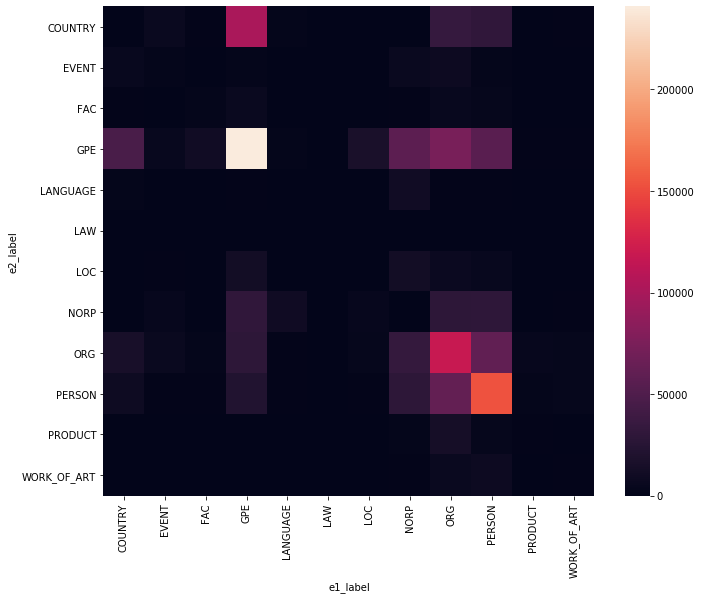

In [36]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m)
plt.show()

In [194]:
#df_m.loc['GPE']['GPE'] = 0
#df_m.loc['GPE']['COUNTRY'] = 0
#df_m.loc['COUNTRY']['GPE'] = 0
#fig, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(df_m)
#plt.show()

In [ ]:
for i in range(len(D_gr)): 
    if D_gr.iloc[i]['e1_label'] == D_gr.iloc[i]['e2_label'] == 'GPE': 
        print(D_gr.iloc[i])

Filter D16 dataset

In [31]:
prohibited_pairs = [('COUTRY', 'COUTRY'), ('COUTRY', 'LOC'), ('LOC', 'LOC'), ('NORP', 'NORP')]


D16 = D16.loc[(D16['e1_label'] != 'COUNTRY') & (D16['e2_label'] != 'COUNTRY')]
D16 = D16.loc[(D16['e1_label'] != 'COUNTRY') & (D16['e2_label'] != 'LOC')]
D16 = D16.loc[(D16['e1_label'] != 'LOC') & (D16['e2_label'] != 'LOC')]
D16 = D16.loc[(D16['e1_label'] != 'NORP') & (D16['e2_label'] != 'NORP')]
D16 = D16.loc[(D16['e1_label'] != 'LOC') & (D16['e2_label'] != 'COUNTRY')]
D16 = D16.loc[(D16['e1_label'] != 'COUNTRY') & (D16['e2_label'] != 'NORP')]
D16 = D16.loc[(D16['e1_label'] != 'NORP') & (D16['e2_label'] != 'COUNTRY')]
D16 = D16.loc[(D16['e1_label'] != 'LANGUAGE') & (D16['e2_label'] != 'LANGUAGE')]

#df_m.loc['COUNTRY']['COUNTRY'] = 0
#df_m.loc['LANGUAGE']['LANGUAGE'] = 0
#df_m.loc['LOC']['LOC'] = 0
#df_m.loc['NORP']['NORP'] = 0
#df_m.loc['COUNTRY']['LOC'] = 0
#df_m.loc['LOC']['COUNTRY'] = 0

#df_m

In [32]:
D16

r        e1  \
2       ([A, second, high, -, speed, line, named, High...    London   
3       ([A, proposal, to, build, a, direct, connectio...    London   
4       ([A, proposal, to, build, a, direct, connectio...    London   
5       ([A, number, of, other, schemes, have, been, c...  Heathrow   
6       ([The, scheme, envisages, a, 15-minute, transf...  Heathrow   
...                                                   ...       ...   
833713  ([Joe, :, A, Real, American, Hero, ", (, vol, ...       Joe   
833831  ([It, is, located, at, 333, Grove, Street, ,, ...    Newton   
833832  ([One, MBTA, bus, route, ,, the, 558, Riversid...      MBTA   
833833  ([One, MBTA, bus, route, ,, the, 558, Riversid...      MBTA   
833842  ([In, 1764, a, London, branch, of, Gillow, 's,...    London   

                   e2 e1_label e2_label                     pair  \
2          Birmingham      GPE      GPE     (Birmingham, London)   
3              Camden      GPE      GPE         (Camden, London)   
4              Camden      GPE      GPE         (Camden, London)   
5             Gatwick      GPE      GPE      (Gatwick, Heathrow)   
6             Gatwick      GPE      GPE      (Gatwick, Heathrow)   
...               ...      ...      ...                      ...   
833713            G.I   PERSON      ORG               (G.I, Joe)   
833831  Massachusetts      GPE      GPE  (Massachusetts, Newton)   
833832         Boston      ORG      GPE           (Boston, MBTA)   
833833         Boston      ORG      GPE           (Boston, MBTA)   
833842  Oxford Street      GPE      FAC  (London, Oxford Street)   

                            tup  
2          (London, Birmingham)  
3              (London, Camden)  
4              (London, Camden)  
5           (Heathrow, Gatwick)  
6           (Heathrow, Gatwick)  
...                         ...  
833713               (Joe, G.I)  
833831  (Newton, Massachusetts)  
833832           (MBTA, Boston)  
833833           (MBTA, Boston)  
833842  (London, Oxford Street)  

[403765 rows x 7 columns]

In [33]:
D16.shape

(403765, 7)

In [195]:
with open('data/D_filtered.pkl', 'wb') as f: 
    D = pickle.dump(D16, f)

### Get examples of each relationship type

In [8]:
with open('data/D_filtered.pkl', 'rb') as f: 
    D = pickle.load(f)

In [11]:
D.shape

(30749, 6)

In [40]:
tosave = D16.groupby(['e1_label', 'e2_label']).first()

tosave.to_csv('examples_labels.csv', sep = ';')
    

In [47]:
tosave1 = D16.groupby(['pair']).first()
tosave2 = D16.groupby(['pair']).last()

tosave = tosave1.append(tosave2)

tosave.to_csv('examples_labels2.csv', sep = ';')

In [48]:
tosave.shape

(21104, 6)

### Get filtered by label type pairs

In [49]:
allowed = [('PER', 'PER'), ('PER', 'ORG'), ('PER', 'GPE'), ('PER', 'LOC'), ('PER', 'COUNTRY'), \
           ('ORG', 'PER'), ('ORG', 'ORG'), ('ORG', 'GPE'), ('ORG', 'LOC'), ('ORG', 'COUNTRY'), 
           ('GPE', 'PER'), ('GPE', 'ORG'), ('LOC', 'PER'), ('LOC', 'ORG'), ('COUNTRY', 'PER'), ('COUNTRY', 'ORG')]

In [53]:
D_gr

r                  e1  \
0       ([HS4Air, is, a, proposed, 140, km, high, -, s...  the United Kingdom   
1       ([The, first, high, -, speed, railway, line, t...  the United Kingdom   
2       ([A, second, high, -, speed, line, named, High...              London   
3       ([A, proposal, to, build, a, direct, connectio...              London   
4       ([A, proposal, to, build, a, direct, connectio...              London   
...                                                   ...                 ...   
833844  ([In, 1980, Waring, and, Gillow, joined, with,...              Waring   
833845  ([In, 1980, Waring, and, Gillow, joined, with,...              Waring   
833846  ([In, 1980, Waring, and, Gillow, joined, with,...              Waring   
833847  ([Germany, ,, as, in, many, other, continental...             Germany   
833848  ([Germany, ,, as, in, many, other, continental...             Germany   

                e2 e1_label     e2_label                           pair  \
0          British  COUNTRY         NORP  (British, the United Kingdom)   
1           London  COUNTRY          GPE   (London, the United Kingdom)   
2       Birmingham      GPE          GPE           (Birmingham, London)   
3           Camden      GPE          GPE               (Camden, London)   
4           Camden      GPE          GPE               (Camden, London)   
...            ...      ...          ...                            ...   
833844      Gillow   PERSON       PERSON               (Gillow, Waring)   
833845      Gillow   PERSON       PERSON               (Gillow, Waring)   
833846      Gillow   PERSON       PERSON               (Gillow, Waring)   
833847    European  COUNTRY         NORP            (European, Germany)   
833848         PhD  COUNTRY  WORK_OF_ART                 (Germany, PhD)   

                                  tup                  labels  
0       (the United Kingdom, British)         (COUNTRY, NORP)  
1        (the United Kingdom, London)          (COUNTRY, GPE)  
2                (London, Birmingham)              (GPE, GPE)  
3                    (London, Camden)              (GPE, GPE)  
4                    (London, Camden)              (GPE, GPE)  
...                               ...                     ...  
833844               (Waring, Gillow)        (PERSON, PERSON)  
833845               (Waring, Gillow)        (PERSON, PERSON)  
833846               (Waring, Gillow)        (PERSON, PERSON)  
833847            (Germany, European)         (COUNTRY, NORP)  
833848                 (Germany, PhD)  (COUNTRY, WORK_OF_ART)  

[1906279 rows x 8 columns]

In [60]:
D_gr_f = D_gr[D_gr.labels.isin(allowed)]

In [61]:
D_gr_f.shape

(280485, 8)

In [62]:
D16 = D_gr_f.groupby('pair').filter(lambda x: len(x) > 16)
D16.shape

(89865, 8)

In [76]:
D100 = D_gr_f.groupby('pair').filter(lambda x: len(x) > 100)
D100.shape

(15497, 8)

In [80]:
D100 = D100.sort_values('pair')

In [82]:
D100.to_csv('hundreds.csv', sep = ';')

In [87]:
print('There are {} relationship statements'. format(len(D_gr_f['pair'])))
print('There are {} unique pairs of entities among them'.format(len(set(D_gr_f['pair']))))

There are 280485 relationship statements
There are 37042 unique pairs of entities among them


In [88]:
print('There are {} relationship statements in D100'. format(len(D100['pair'])))
print('There are {} unique pairs of entities among them in D100'.format(len(set(D100['pair']))))

There are 15497 relationship statements in D100
There are 89 unique pairs of entities among them in D100


In [89]:
set(D100['pair'])

{('ABC', 'CBS'),
 ('ABC', 'NBC'),
 ('Airbus', 'Boeing'),
 ('Allied', 'Germany'),
 ('Army', 'Navy'),
 ('Army', 'Potomac'),
 ('Austin', 'the University of Texas'),
 ('BBC', 'London'),
 ('BBC', 'UK'),
 ('Balliol College', 'Oxford'),
 ('Bangladesh', 'National Parliament'),
 ('Bangladesh', 'the Awami League'),
 ('Barrichello', 'Häkkinen'),
 ('Benetton', 'Ferrari'),
 ('Benetton', 'McLaren'),
 ('Blu-ray', 'DVD'),
 ('CBS', 'Fox'),
 ('CBS', 'NBC'),
 ('CBS', 'NFL'),
 ('Cadastral', 'New South Wales'),
 ('Cambridge', 'Trinity College'),
 ('Canada', 'Senate'),
 ('Canada', 'the House of Commons of Canada'),
 ('Christ Church', 'Oxford'),
 ('Christianity', 'Islam'),
 ('Colts', 'Indianapolis'),
 ('Confederate', 'Richmond'),
 ('Confederate', 'Union'),
 ('Confederate', 'Virginia'),
 ('Congress', 'Senate'),
 ('Congress', 'U.S.'),
 ('Congress', 'the United States'),
 ('Cowboys', 'Dallas'),
 ('DVD', 'VHS'),
 ('Donbass', 'the Ministry of Defence'),
 ('Dublin', 'Trinity College'),
 ('EU', 'Turkey'),
 ('EU', '

In [92]:
counts = D16.pair.value_counts()

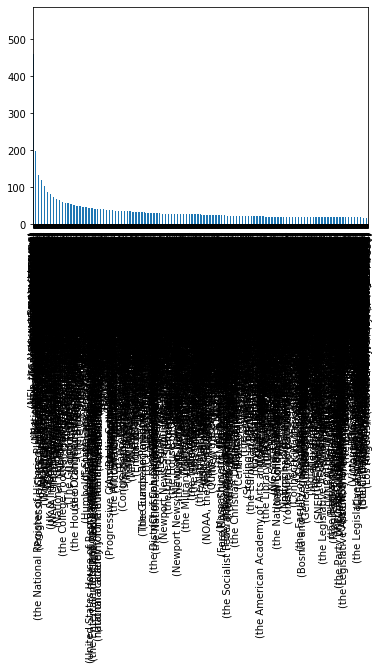

In [99]:
counts.plot(kind='bar')
plt.show()

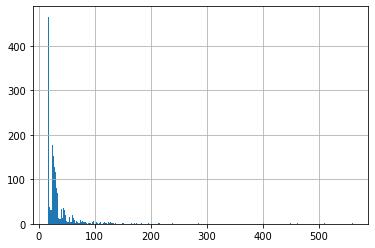

In [104]:
counts.hist(bins = 500)
plt.show()

### Sample from too populated pairs 

In [192]:
D16 = D_gr_f.groupby('pair').filter(lambda x: 16 < len(x) < 50)
D16.shape

(57530, 8)

In [193]:
D50 = D_gr_f.groupby('pair').filter(lambda x: len(x) > 50)
D50.shape

(31585, 8)

In [194]:
print('There are {} relationship statements in D50'. format(len(D50['pair'])))
print('There are {} unique pairs of entities among them in D50'.format(len(set(D50['pair']))))

There are 31585 relationship statements in D50
There are 328 unique pairs of entities among them in D50


In [195]:
D50['pair'] = D50['pair'].astype(str)
D50_sampled = D50.groupby(['pair']).apply(lambda group_df: group_df.sample(50)).reset_index(drop = True)
D50_sampled

r                 e1  \
0      ([NBC, and, CBS, began, commercial, operations...                CBS   
1      ([In, 2008, -, 09, ,, she, was, a, guest, star...                ABC   
2      ([Three, minutes, later, ,, at, 2:00, EST, ,, ...                CBS   
3      ([The, best, -, known, commercial, broadcaster...                ABC   
4      ([It, was, originally, an, ABC, affiliate, ,, ...                ABC   
...                                                  ...                ...   
16395  ([Before, the, Supreme, Court, of, the, United...  the Supreme Court   
16396  ([Oliver, Wendell, Holmes, ,, Jr., ,, of, the,...  the Supreme Court   
16397  ([Five, days, later, ,, on, March, 16, ,, Obam...  the Supreme Court   
16398  ([In, his, book, ,, Gerald, Rosenberg, questio...  the Supreme Court   
16399  ([Washington, Education, Ass'n, ,, a, landmark...  the Supreme Court   

                      e2 e1_label e2_label  \
0                    ABC      ORG      ORG   
1                    CBS      ORG      ORG   
2                    ABC      ORG      ORG   
3                    CBS      ORG      ORG   
4                    CBS      ORG      ORG   
...                  ...      ...      ...   
16395  the United States      ORG  COUNTRY   
16396  the United States      ORG  COUNTRY   
16397  the United States      ORG  COUNTRY   
16398  the United States      ORG  COUNTRY   
16399  the United States      ORG  COUNTRY   

                                             pair  \
0                                  ('ABC', 'CBS')   
1                                  ('ABC', 'CBS')   
2                                  ('ABC', 'CBS')   
3                                  ('ABC', 'CBS')   
4                                  ('ABC', 'CBS')   
...                                           ...   
16395  ('the Supreme Court', 'the United States')   
16396  ('the Supreme Court', 'the United States')   
16397  ('the Supreme Court', 'the United States')   
16398  ('the Supreme Court', 'the United States')   
16399  ('the Supreme Court', 'the United States')   

                                          tup          labels  
0                                  (CBS, ABC)      (ORG, ORG)  
1                                  (ABC, CBS)      (ORG, ORG)  
2                                  (CBS, ABC)      (ORG, ORG)  
3                                  (ABC, CBS)      (ORG, ORG)  
4                                  (ABC, CBS)      (ORG, ORG)  
...                                       ...             ...  
16395  (the Supreme Court, the United States)  (ORG, COUNTRY)  
16396  (the Supreme Court, the United States)  (ORG, COUNTRY)  
16397  (the Supreme Court, the United States)  (ORG, COUNTRY)  
16398  (the Supreme Court, the United States)  (ORG, COUNTRY)  
16399  (the Supreme Court, the United States)  (ORG, COUNTRY)  

[16400 rows x 8 columns]

In [207]:
D16 = D16.append(D50_sampled).reset_index(drop = True)

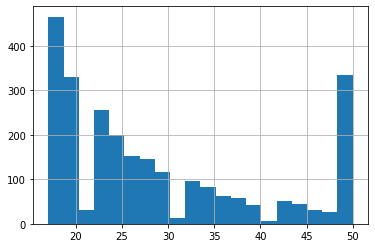

In [208]:
counts = D16.pair.value_counts()
counts.hist(bins = 20)
plt.show()

In [210]:
D16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73930 entries, 0 to 73929
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   r         73930 non-null  object
 1   e1        73930 non-null  object
 2   e2        73930 non-null  object
 3   e1_label  73930 non-null  object
 4   e2_label  73930 non-null  object
 5   pair      73930 non-null  object
 6   tup       73930 non-null  object
 7   labels    73930 non-null  object
dtypes: object(8)
memory usage: 4.5+ MB


In [212]:
D16 = D16.drop(['e1_label', 'e2_label', 'pair', 'tup', 'labels'], axis = 1)

In [213]:
D16

r  \
0      ([She, was, re, -, elected, to, the, Provincia...   
1      ([The, PAVN, forces, comprising, the, 97th, Ba...   
2      ([At, 03:30, on, 6, May, the, PAVN, attacked, ...   
3      ([The, battle, was, claimed, as, a, U.S., vict...   
4      ([In, June, 1981, ,, Homma, was, elected, Japa...   
...                                                  ...   
73925  ([Before, the, Supreme, Court, of, the, United...   
73926  ([Oliver, Wendell, Holmes, ,, Jr., ,, of, the,...   
73927  ([Five, days, later, ,, on, March, 16, ,, Obam...   
73928  ([In, his, book, ,, Gerald, Rosenberg, questio...   
73929  ([Washington, Education, Ass'n, ,, a, landmark...   

                                     e1                 e2  
0      the Provincial Assembly of Sindh                PPP  
1                                  PAVN               U.S.  
2                                  PAVN               U.S.  
3                                  U.S.               PAVN  
4                                 Japan   AFC Championship  
...                                 ...                ...  
73925                 the Supreme Court  the United States  
73926                 the Supreme Court  the United States  
73927                 the Supreme Court  the United States  
73928                 the Supreme Court  the United States  
73929                 the Supreme Court  the United States  

[73930 rows x 3 columns]

In [214]:
with open('data/D_sampled.pkl', 'wb') as f: 
    D = pickle.dump(D16, f)